# **Part 0: Importing tools and data for analysis**

First, all needed packages are imported.

In [468]:
# Import packages 

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import operator
from scipy import stats
from fancyimpute import KNN 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import math
from sklearn.model_selection import train_test_split
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import copy 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [394]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Next, the training and scoring dataset are imported.

In [527]:
# Import training dataset

filepath_train = 'C:/Users/Emma/Documents/Machine learning with Python/Exam/train_V2.csv'
train_dataset = pd.read_csv(filepath_train, sep = ',')

# Import scoring dataset

filepath_score = 'C:/Users/Emma/Documents/Machine learning with Python/Exam/score.csv'
score_dataset = pd.read_csv(filepath_score, sep = ',')

In [396]:
# Alterative import from Daan's directory

# filepath_train = '/content/drive/My Drive/Colab Notebooks/train_V2.csv'
# train_dataset = pd.read_csv(filepath_train, sep = ',')

# filepath_score = '/content/drive/My Drive/Colab Notebooks/score.csv'
#score_dataset = pd.read_csv(filepath_score, sep = ',')



# **Part 1: Data exploration**

We are going to check:
- the number of observations and variables
- a view of a couple of observations
- a summary of the variables
- the distribution of the 3 outcome variables

In [397]:
# number of observations and variables
train_dataset.shape

(5000, 53)

In [398]:
# view of 10 observations
pd.options.display.max_columns = None
display(train_dataset.head(n=10))

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00
5,5108.0,289.0,6280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,False,6.0,0.0,27621.0,84.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,350.0,29.0,0.0,0.0,0.0,4.0,V,0.000000,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.421064,0.584441,0.872812,0.668272,NaN,NaN,4318.76,0,0.00
6,13293.0,28.0,14704.0,0.0,0.0,15000.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0,True,18.0,0.0,33459.0,46.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,3.0,2.0,324.0,27.0,0.0,0.0,0.0,82.0,M,0.000000,0.0,0.0,1.0,0.566906,0.84632,0.595743,0.901703,NaN,NaN,NaN,NaN,NaN,NaN,1676.75,1,888.09
7,227.0,0.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,9.0,0.0,29087.0,56.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1127.05,0,0.00
8,229.0,810.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,True,6.0,0.0,33508.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.894609,1640.31,0,0.00
9,229.0,810.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,True,6.0,0.0,31718.0,29.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,145.0,12.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.196373,0.318601,NaN,NaN,NaN,NaN,1861.78,1,981.64


In [399]:
# summary of the variables
round(train_dataset.describe(include = 'all'), 2)

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,4947.00,4947.00,4947.00,4954.00,4947.00,4947.00,4947.00,4947.00,4947.00,4947.00,4970.00,4999.00,4912.00,5000,4947.00,4947.00,4761.00,4947.00,4947.0,4947.00,4912.00,4912.00,4947.0,4947.00,4947.00,4947.00,4947.0,4947.00,4947.00,4608.00,4608.00,4947.00,4947.00,4973.00,4947.00,4947,4947.00,4912.00,4947.00,4947.00,1225.00,1314.00,1209.00,1304.00,1261.00,1367.00,1223.00,1324.00,1232.00,1493.00,5000.00,5000.00,5000.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2281.26,696.06,3637.90,145.95,0.35,3298.72,0.04,0.02,0.09,0.39,0.40,0.02,6.05,NaN,5.65,0.29,32778.56,44.90,0.5,0.88,0.05,0.00,1.3,0.21,0.89,0.25,0.1,1.96,0.39,273.11,22.78,0.02,0.22,121.08,28.99,NaN,403.02,0.15,0.18,0.03,0.50,0.50,0.50,0.50,0.49,0.50,0.50,0.50,0.50,5.19,1967.31,0.26,189.97
std,8365.25,3051.12,5726.63,581.07,0.89,4549.65,0.20,0.16,0.29,0.49,0.49,0.15,3.11,NaN,5.05,0.45,6858.67,16.23,0.5,0.32,0.22,0.07,0.8,0.83,0.31,0.43,0.3,0.81,0.83,152.50,12.72,0.14,0.71,1783.15,37.48,NaN,1335.94,0.36,0.39,0.18,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,3.16,1371.06,0.44,379.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,16.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.87,10.68,0.00,0.00
25%,229.00,0.00,1638.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,NaN,2.00,0.00,28630.00,31.00,0.0,1.00,0.00,0.00,1.0,0.00,1.00,0.00,0.0,1.00,0.00,154.00,13.00,0.00,0.00,0.00,4.00,NaN,0.00,0.00,0.00,0.00,0.25,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,3.12,1333.32,0.00,0.00
50%,469.00,52.00,1889.00,0.00,0.00,1500.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,NaN,5.00,0.00,31990.00,45.00,0.0,1.00,0.00,0.00,1.0,0.00,1.00,0.00,0.0,2.00,0.00,271.00,23.00,0.00,0.00,0.00,11.00,NaN,0.00,0.00,0.00,0.00,0.50,0.50,0.50,0.50,0.49,0.50,0.49,0.50,0.50,5.19,1721.24,0.00,0.00
75%,1688.00,810.00,3165.50,0.00,0.00,5000.00,0.00,0.00,0.00,1.00,1.00,0.00,9.00,NaN,8.00,1.00,35924.00,57.00,1.0,1.00,0.00,0.00,2.0,0.00,1.00,1.00,0.0,3.00,0.00,368.25,31.00,0.00,0.00,0.00,45.00,NaN,0.00,0.00,0.00,0.00,0.75,0.75,0.74,0.75,0.74,0.75,0.75,0.75,0.75,7.36,2223.71,1.00,202.61


The training dataset contains 5000 observations and 53 variables which are categorical, binary or continuous.   
Some data cleaning and transformation will be needed before analysis:
- handling missing values (deletion or imputation)
- feature engineering of categorical variables
- outlier detection   

There are 3 outcome variables:
- outcome_profit
- outcome_damage_inc
- outcome_damage_amount


Next, we will look at the distribution of these outcome variables. 

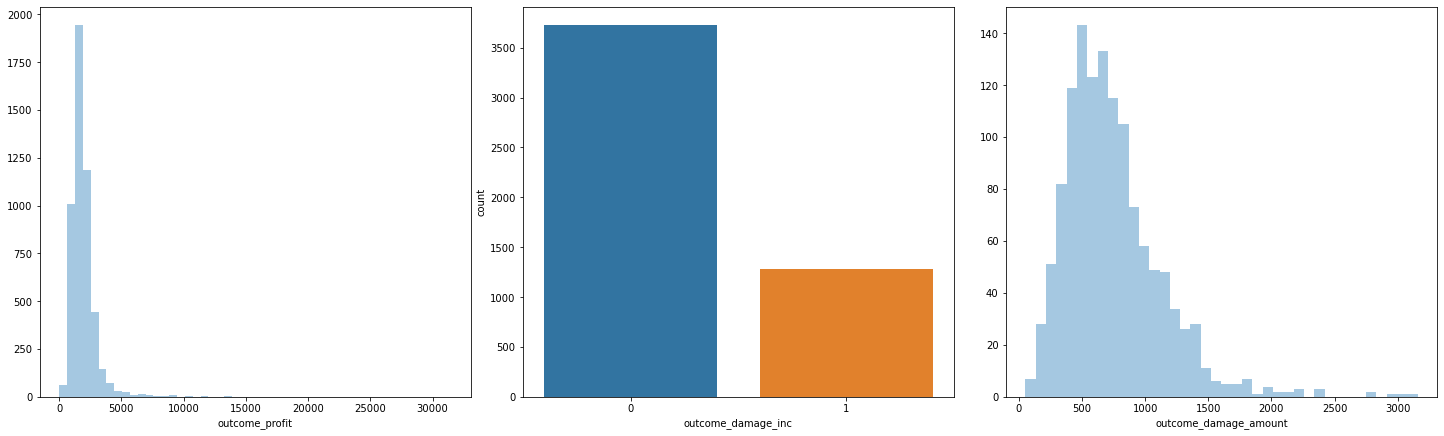

In [400]:
# Check histogram for continous variables (outcome_profit, outcome_damage_amount) 
# and barplot for binary variable (outcome_damage_inc)
# Only check damage amount for customers who caused damage

fig, ax =plt.subplots(1,3, figsize=(20,6))
sns.distplot(train_dataset['outcome_profit'], kde=False, ax = ax[0])
sns.countplot(x = 'outcome_damage_inc', data = train_dataset, ax = ax[1])
sns.distplot(train_dataset.loc[train_dataset['outcome_damage_amount'] != 0, 'outcome_damage_amount'], kde=False, ax = ax[2])
fig.tight_layout(pad=0.5)

In most cases, the profit per customer is somewhere between 0 and 5000 euro.  
A bit less then 1500 out of the 5000 customers caused damage with (in general) a damage amount between 0 and 2000 euro.

The profit and the damage amount may also depend on the number of nights that the customer stayed in the hotel. Therefore, let's have a look at the profit and damage per night as well. 

       outcome_profit_per_night  outcome_damage_per_night
count                   4947.00                   4947.00
mean                     521.79                     35.78
std                     1038.54                    127.38
min                        0.19                      0.00
25%                       31.19                      0.00
50%                      174.10                      0.00
75%                      590.08                      4.16
max                    31529.00                   2369.23


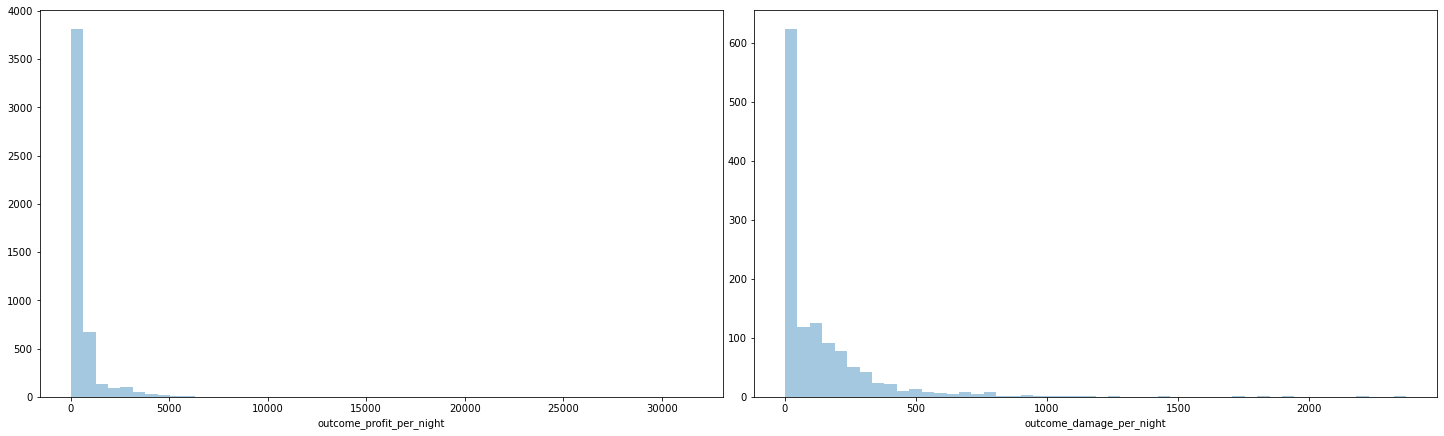

In [401]:
# Calculate profit and damage per night 

train_dataset['outcome_profit_per_night'] = train_dataset['outcome_profit'] / train_dataset['nights_booked']
train_dataset['outcome_damage_per_night'] = train_dataset['outcome_damage_amount'] / train_dataset['nights_booked']


# Summary of profit and damage per night 

print(round(train_dataset.loc[:, ['outcome_profit_per_night', 'outcome_damage_per_night']].describe(include = 'all'), 2))


# Check plots again

fig, ax =plt.subplots(1,2, figsize=(20,6))
sns.distplot(train_dataset['outcome_profit_per_night'], kde=False, ax = ax[0])
sns.distplot(train_dataset.loc[train_dataset['outcome_damage_per_night'] != 0, 'outcome_damage_per_night'], kde=False, ax = ax[1])
fig.tight_layout(pad=0.5)




In general the profit per night varies between 0 and 5000 euro and the damage per night varies between 0 and 1000 euro.   
Later, it needs to be decided whether these outcomes per night or the original outcomes will be used to build a predictive model. 




# **Part 2: Missing data**

### **Part 2a: Missing values per variable**

We will first have a look at the number of missing values per variable.   
The variables will be sorted according to descending number of missing values.


In [402]:
# Calculate number and percentage of missing values per variable 

total = train_dataset.isnull().sum().sort_values(ascending=False)
percent = round((train_dataset.isnull().sum()/train_dataset.isnull().count()).sort_values(ascending=False)*100, 1)
na_per_var = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
na_per_var.head(53)

,Total,Percent
score2_pos,3791,75.8
score4_pos,3777,75.5
score1_pos,3775,75.5
score5_pos,3768,75.4
score3_pos,3739,74.8
score2_neg,3696,73.9
score1_neg,3686,73.7
score4_neg,3676,73.5
score3_neg,3633,72.7
score5_neg,3507,70.1


It seems that all feature variables except for "married_cd" have missing values. For most variables, the number of missing values is limited. Only the variables related to the positive and negative scores that the hotels gave to the customers in the past have a very high percentage of missing values (70.1 % to 75.8%). This high number of missing values is not unexpected, it makes sense that most of the customers did not visit all 5 hotels and received scores. A first step to solve this issue is to calculate the average positive score and the average negative score across hotels for each customer. Like this only customers without any score will have a missing value. The number of positive scores and negative scores given to a customer will also be counted. 

### **Part 2B: Handling missing values for score variables**

###### 1. Check distribution

In the dictionary about the data it was mentioned that the scores where expressed as quantiles. Therefore, it is expected that the scores follow a uniform distribution and only contain values between 0 and 1. In the data exploration, it already appeared that the 5th negative scores are not between 0 and 1. Let's check the distributions of the variables as well. 

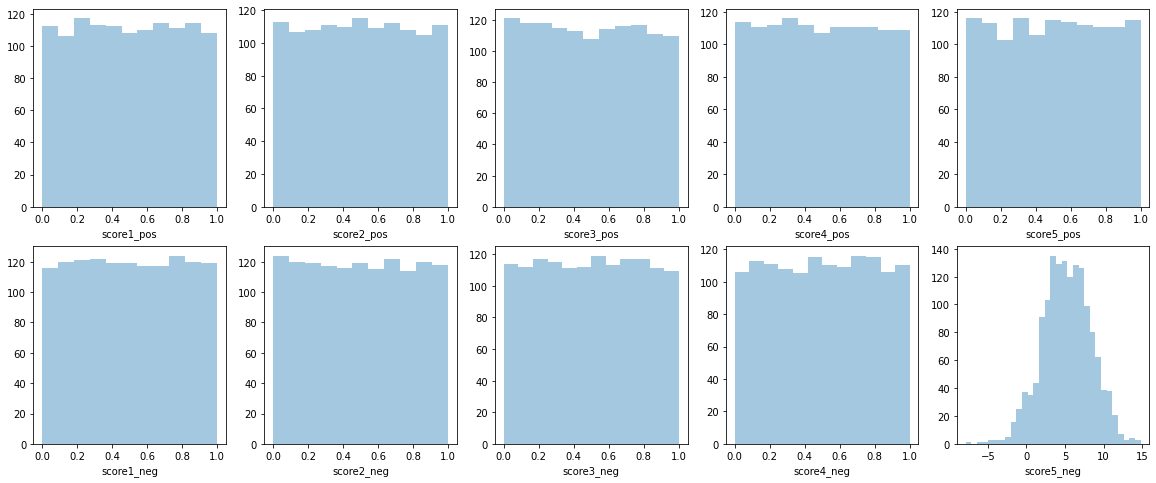

In [403]:
# Check distribution of score variables 

fig, ax = plt.subplots(2,5, figsize=(20,8))
sns.distplot(train_dataset['score1_pos'], ax = ax[0,0], kde=False)
sns.distplot(train_dataset['score2_pos'], ax = ax[0,1], kde=False)
sns.distplot(train_dataset['score3_pos'], ax = ax[0,2], kde=False)
sns.distplot(train_dataset['score4_pos'], ax = ax[0,3], kde=False)
sns.distplot(train_dataset['score5_pos'], ax = ax[0,4], kde=False)
sns.distplot(train_dataset['score1_neg'], ax = ax[1,0], kde=False)
sns.distplot(train_dataset['score2_neg'], ax = ax[1,1], kde=False)
sns.distplot(train_dataset['score3_neg'], ax = ax[1,2], kde=False)
sns.distplot(train_dataset['score4_neg'], ax = ax[1,3], kde=False)
sns.distplot(train_dataset['score5_neg'], ax = ax[1,4], kde=False)


All score variables follow a uniform distribution between 0 and 1, except the score5_neg variable. So, first these scores have to be converted to quantiles. After that the average score and the number of scores can be calculated. 



###### 2. Negative scores

First, make a subset dataframe only containing the negative scores. 

In [404]:
# List of variable names for positive scores

neg_scores = ['score1_neg',
              'score2_neg',
              'score3_neg',
              'score4_neg', 
              'score5_neg']

# Create an empty vector

id_neg_scores = [None] * len(train_dataset.columns)


# Fill vector with boolean values indicating if variable in train_dataset is a negative score 

for i in range(0, len(train_dataset.columns)):
    id_neg_scores[i] = train_dataset.columns[i] in neg_scores
    

# Create dataframe only with negative scores 

negative_scores = train_dataset.loc[:, id_neg_scores]


Next, the 5th negative score has to be converted to quantiles. A remark is that this conversion will also have to be done for the score dataset. In order to align the scores as much as possible, the quantiles will be calculated based on the train and score dataset together. 

Following steps will be done:
- create series of all 5th negative scores of the train and score dataset, excluding all missing values
- calculate the quantile for the 5th negative score in the training dataset
- check if score follows uniform distribution between 0 and 1 after transformation



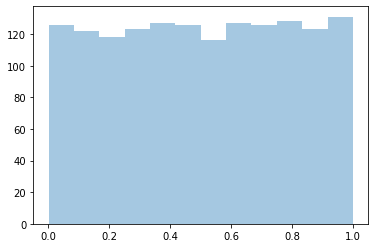

In [405]:
# Obtain and combine 5th negative score (don't take missing values into account) for train and score dataset

part_train = negative_scores['score5_neg'].dropna().reset_index(drop=True)
part_score = score_dataset['score5_neg'].dropna().reset_index(drop=True)

all_neg5_scores_no_NA = part_train.append(part_score)


# Obtain 5th negative score for training dataset with missing values 

score5_neg_train = negative_scores['score5_neg']


# Create a vector indicating when a customer has a missing value for 5th negative score

missing_values = score5_neg_train.isnull()


# Create vector with quantiles 

score5_neg_quant = [None]*len(score5_neg_train)
score5_neg_quant

for i in range(0, len(score5_neg_train)):
    
    if missing_values[i] == True:
        score5_neg_quant[i] = float("NaN")
        
    else:
         score5_neg_quant[i] =stats.percentileofscore(all_neg5_scores_no_NA, score5_neg_train[i])/100
            

# Check distribution 

sns.distplot(score5_neg_quant, kde = False)
plt.show() 

As can be seen on the plot above, the score now follows a uniform distribution (as expected for quantiles).  
Next, replace the old score by the new score and calculate the average negative score and the number of negative scores for each customer. 


In [406]:
# Replace 5th negative score by the calculated quantiles

negative_scores_2 = pd.concat([negative_scores.iloc[:, 0:4], 
                               pd.DataFrame(score5_neg_quant, columns= ['score5_neg'])],
                              axis=1)

print(negative_scores_2.head(5))


# Calculate the average negative score and the number of negative scores per customer.

average_neg_score = negative_scores_2.mean(axis = 1, skipna = True)
n_neg_score = negative_scores_2.notnull().sum(axis=1)


# Check number of missing values 

print("Number of missing values:", average_neg_score.isnull().sum())
print("Percentage of missing values:", average_neg_score.isnull().sum()/len(average_neg_score)*100)



   score1_neg  score2_neg  score3_neg  score4_neg  score5_neg
0     0.98334         NaN         NaN    0.082288         NaN
1         NaN         NaN         NaN         NaN    0.813600
2         NaN    0.099529         NaN         NaN    0.126897
3         NaN         NaN    0.889793         NaN         NaN
4         NaN         NaN    0.766294    0.542445         NaN
Number of missing values: 1166
Percentage of missing values: 23.32


  
  By calculating the average negative score, the number of missing values has been reduced from around 75% to 23.3 %, which is already a good improvement.   
In total, there are 1166 customers who did not receive a negative score (maybe because they did not go to the other hotels yet). 


###### 3. Positive scores

For the positive scores, the average score and the number of scores can immediately be obtained.

In [407]:
# Positive scores

# List of variable names for positive scores

pos_scores = ['score1_pos',
              'score2_pos',
              'score3_pos',
              'score4_pos',
              'score5_pos']

# Create an empty vector

id_pos_scores = [None] * len(train_dataset.columns)


# Fill vector with boolean values indicating if variable in train_dataset is a positive score 

for i in range(0, len(train_dataset.columns)):
    id_pos_scores[i] = train_dataset.columns[i] in pos_scores
    

# Create dataframe only with positive scores 

positive_scores = train_dataset.loc[:, id_pos_scores]
    
    
# Calculate the average positive score per customer

average_pos_score = positive_scores.mean(axis = 1, skipna = True)
n_pos_score = positive_scores.notnull().sum(axis=1)


# Check number of missing values 

print("Number of missing values:", average_pos_score.isnull().sum())
print("Percentage of missing values:", average_pos_score.isnull().sum()/len(average_pos_score)*100)



Number of missing values: 1597
Percentage of missing values: 31.94


By calculating the average positive score, the number of missing values has been reduced from around 75% to 31.9 %, which is also a good improvement.   
In total, there are 1597 customers who did not receive a positive score. 


###### 4. Update training dataset with new variables

Concatenate the 4 new variables to the train_dataset dataframe. Additionally, drop the original score columns since these will be not needed anymore. 

In [408]:
# Add new variables

train_dataset['average_neg_score'] = average_neg_score
train_dataset['n_neg_score'] = n_neg_score
train_dataset['average_pos_score'] = average_pos_score
train_dataset['n_pos_score'] = n_pos_score


# Remove original score variables 

train_dataset_new = train_dataset.drop(train_dataset.loc[:, 'score1_pos':'score5_neg'].columns, axis = 1)


# Check output 

print(train_dataset_new.columns)
train_dataset_new.shape

Index(['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc',
       'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic',
       'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd',
       'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit',
       'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl',
       'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size',
       'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no',
       'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use',
       'retired', 'gold_status', 'outcome_profit', 'outcome_damage_inc',
       'outcome_damage_amount', 'outcome_profit_per_night',
       'outcome_damage_per_night', 'average_neg_score', 'n_neg_score',
       'average_pos_score', 'n_pos_score'],
      dtype='object')


(5000, 49)

### **Part 2c: Missing values per customer**

###### 1. First analysis

Check the number of missing values per customer. 

53


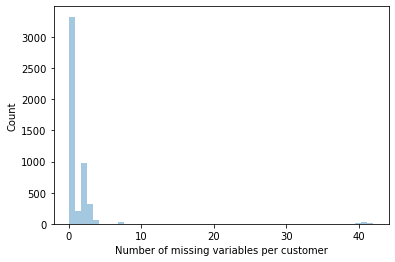

In [409]:
# count number of missing values per customer and plot histogram

nan_rowcount = train_dataset_new.isnull().sum(axis=1)
sns.distplot(nan_rowcount, kde = False)
plt.xlabel('Number of missing variables per customer')
plt.ylabel('Count')

# count number of customers with more than 35 missing values 

id_cust_most_nan = list(nan_rowcount[nan_rowcount > 35].index)
id_other_cust = list(nan_rowcount[nan_rowcount <= 35].index)
print(len(id_cust_most_nan))

Two groups can be distinguished:
- 53 customers with missing values for more than 35 variables
- remaining customers with less missing variables 

Next, check the info of the 53 customers that we do have. 

In [410]:
# Split data in 2 groups (with and without many missing variables) 

cust_nan =  train_dataset_new.iloc[id_cust_most_nan,:]
other_cust =  train_dataset_new.iloc[id_other_cust,:]
cust_nan.head(n = 53)


# which variables are not missing for all rows/customers?

cust_nan.isnull().sum()[cust_nan.isnull().sum() != len(id_cust_most_nan)]

damage_am                46
spa_ic                   30
empl_ic                   1
married_cd                0
claims_am                27
outcome_profit            0
outcome_damage_inc        0
outcome_damage_amount     0
n_neg_score               0
n_pos_score               0
dtype: int64

7 features are not missing for the 53 customers: 
- damage_am
- spa_ic
- empl_ic
- married_cd
- claims_am
- n_neg_score
- n_pos_score

The outcome variables are also present for these customers. 


###### 2. Pattern search

Next, we will look if a pattern can be found in the 7 features and the 3 outcome variables for the 53 customers. Like this we are trying to find out if this data is missing at random or not. 

First we will compare histograms for those variables between the group of customers with and without many missing values. 


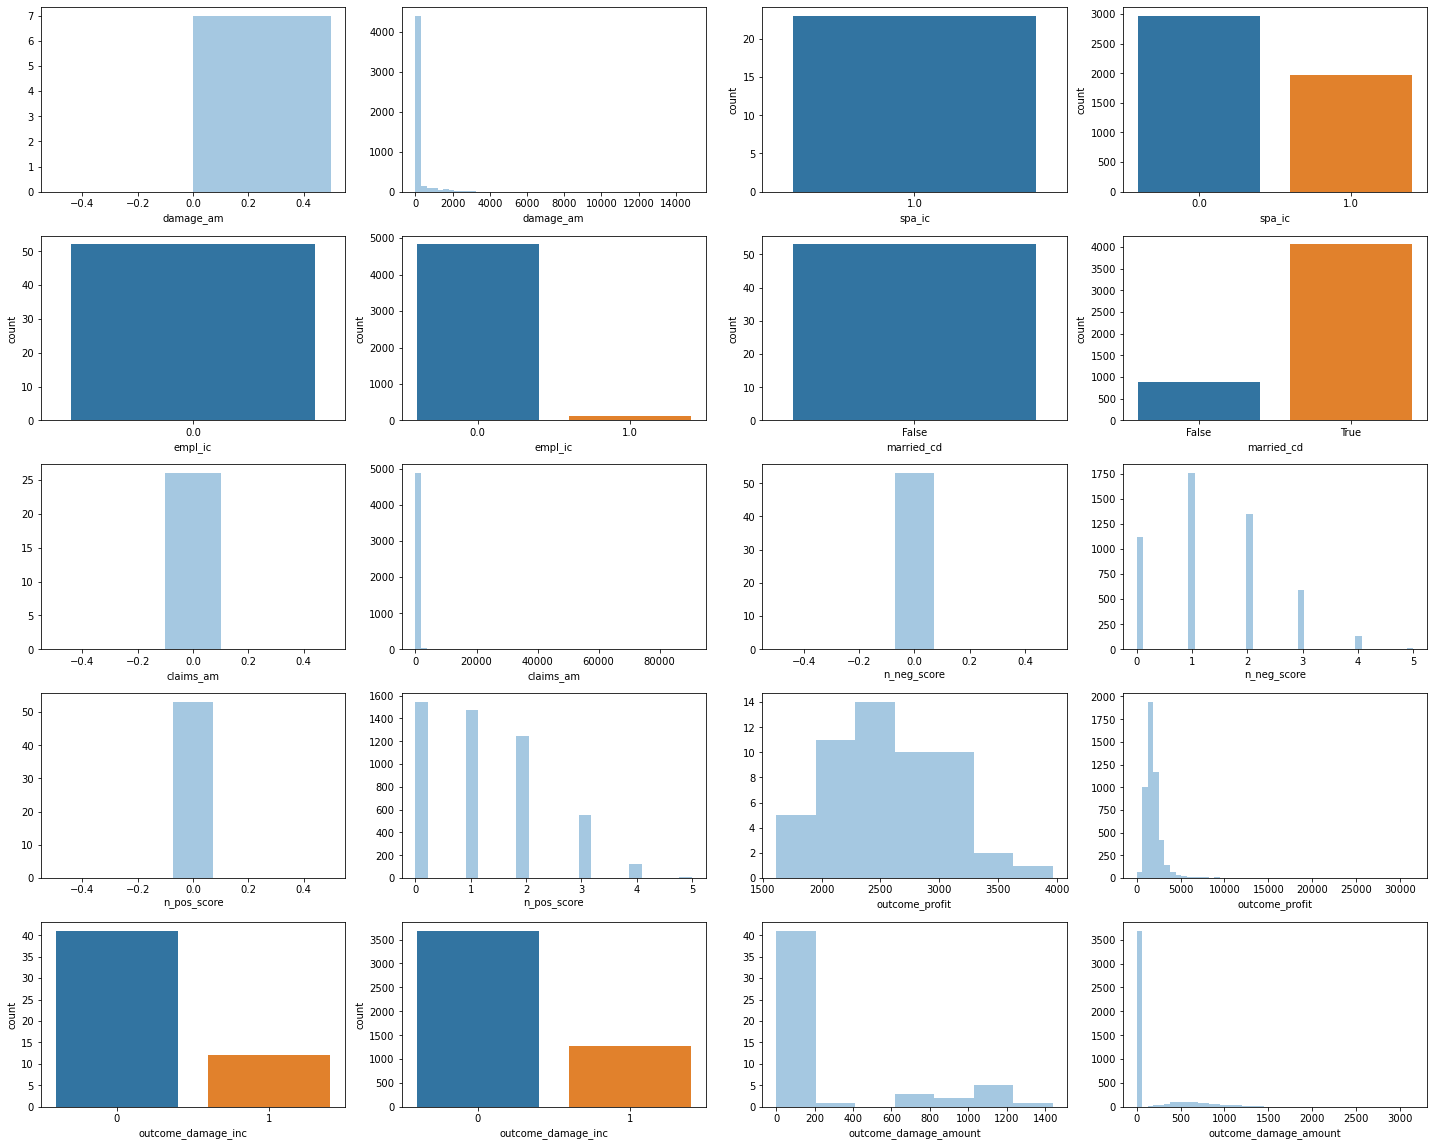

In [411]:
# Plot histograms

fig, ax= plt.subplots(5,4, figsize=(20,16))

sns.distplot(cust_nan['damage_am'], kde = False, ax = ax[0,0])
sns.distplot(other_cust['damage_am'], kde = False, ax = ax[0, 1])

sns.countplot(x = 'spa_ic', data = cust_nan, ax = ax[0,2])
sns.countplot(x = 'spa_ic', data = other_cust, ax = ax[0,3])

sns.countplot(x = 'empl_ic', data = cust_nan, ax = ax[1, 0])
sns.countplot(x = 'empl_ic', data = other_cust, ax = ax[1, 1])

sns.countplot(x = 'married_cd', data = cust_nan, ax = ax[1,2])
sns.countplot(x = 'married_cd', data = other_cust, ax = ax[1,3])

sns.distplot(cust_nan['claims_am'], ax = ax[2,0], kde = False)
sns.distplot(other_cust['claims_am'], ax = ax[2,1], kde = False)

sns.distplot(cust_nan['n_neg_score'], ax = ax[2,2], kde = False)
sns.distplot(other_cust['n_neg_score'], ax = ax[2,3], kde = False)

sns.distplot(cust_nan['n_pos_score'], ax = ax[3,0], kde = False)
sns.distplot(other_cust['n_pos_score'], ax = ax[3,1], kde = False)

sns.distplot(cust_nan['outcome_profit'], ax = ax[3,2], kde = False)
sns.distplot(other_cust['outcome_profit'], ax = ax[3,3], kde = False)

sns.countplot(x = 'outcome_damage_inc', data = cust_nan, ax = ax[4,0])
sns.countplot(x = 'outcome_damage_inc', data = other_cust, ax = ax[4,1])

sns.distplot(cust_nan['outcome_damage_amount'], ax = ax[4,2], kde = False)
sns.distplot(other_cust['outcome_damage_amount'], ax = ax[4,3], kde = False)
fig.tight_layout(pad=1)

From the histograms, it can be concluded that all 53 customers:
- hardly caused any damage before
- are spa users
- are no empoyee of chain
- are unmarried
- didn't have compensations after claims
- didn't get a positive or negative score

No clear differences in the outcome variables where found between the two groups of customers. 

It has to be decided whether these clients should be retained, or discarded. 


###### 3. Can these missing values be random?

Assuming that the data is missing randomly, we would expect that the percentage of not married customers would be simular in the group of 53 customers and in the group of other customers. So, what is the chance that all 53 customers are by coincidence not married? A simular logic can be followed for the spa usage. In order to check this, we can estimate these probabilities by using the binomial distribution. 

Percentage not married:  0.18
Probability that 53 customers are not married:  0.0023
Percentage spa users:  0.4
Probability that 53 customers are spa users:  0.0029


Text(0.5, 1.0, 'Spa user')

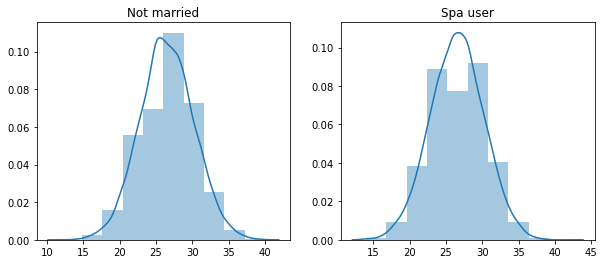

In [412]:
# Set seed and create function for the binomial distribution

np.random.seed(1)

def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i>=0.50]))
    return heads


# Calculate the percentage of not married people in the other group

perc_not_married = len(other_cust[other_cust['married_cd'] == False])/len(other_cust)
print("Percentage not married: ",  round(perc_not_married, 2))


# What is the probability that all 53 customers are not married?

nr_not_married = run_binom(10000, 53, perc_not_married)
prob_not_married = nr_not_married[nr_not_married == 53]/len(nr_not_married)
print("Probability that 53 customers are not married: ", prob_not_married )


# Calculate the percentage of spa users in the other group

perc_spa = len(other_cust[other_cust['spa_ic'] == 1])/len(other_cust)
print("Percentage spa users: ",  round(perc_spa, 2))


# What is the probability that all 53 customers are spa users?

nr_spa = run_binom(10000, 53, perc_spa)
prob_spa = nr_spa[nr_spa == 53]/len(nr_spa)
print("Probability that 53 customers are spa users: ",prob_spa )


# Plots 

fig, ax= plt.subplots(1,2, figsize=(10,4))
sns.distplot(nr_not_married, bins = 10, ax = ax[0]).set_title("Not married")
sns.distplot(nr_spa, bins = 10, ax = ax[1]).set_title("Spa user")


If we randomly sample from from the population without many missing values, we only have 0.2% chance of getting a sample where all the persons are married and only 0.3% chance of getting a sample where all the persons are spa users. The chance of the combination of those two is even much smaller. It thus seems that this sample of 53 customers does not contain so many missing values at random. 

Since the amount of variables missing is very high (more than 90 %) and the amount of rows having this trend is fairly low (only  1% approximately), we opt to leave these observations out of the analysis.  

###### 4. Remove observations from training dataset

Remove the 53 customers from the training dataset and check the number of missing data per variable again. 

In [413]:
# Remove 53 customers with many missing values 

train_dataset_lim = other_cust

# Check number of missing values per variable again

total = train_dataset_lim.isnull().sum().sort_values(ascending=False)
percent = (train_dataset_lim.isnull().sum()/train_dataset_lim.isnull().count()).sort_values(ascending=False)
missing_data_improw = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_improw.head(53)


,Total,Percent
average_pos_score,1544,0.312108
average_neg_score,1113,0.224985
tenure_mts,339,0.068526
tenure_yrs,339,0.068526
neighbor_income,186,0.037599
dining_ic,35,0.007075
cab_requests,35,0.007075
shop_use,35,0.007075
presidential,35,0.007075
urban_ic,0,0.000000


A lot of variables don't appear to be having any missing values anymore by deleting the 53 rows mentioned above. 

# **Part 3: Check for highly correlated variables**

Based on the description of the variables in the dictionary, we expect some of them to be correlated (for example the shop use and the shopping amount or the age of the customer and the fact that he/she is retired or not). In order to investigate this further, a correlation matrix will be plotted and a list of all variables with a correlation coefficient of more than 0.5 will be shown. 

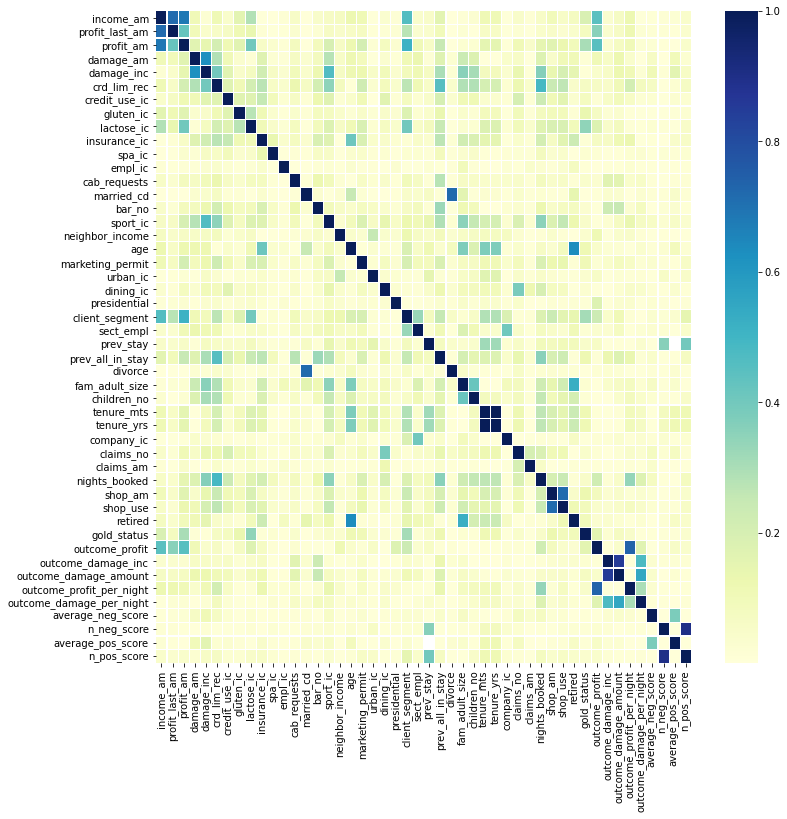

,variable 1,variable 2,correlation
5,tenure_mts,tenure_yrs,0.9998
12,n_neg_score,n_pos_score,0.8990
9,outcome_damage_inc,outcome_damage_amount,0.8550
10,outcome_profit,outcome_profit_per_night,0.7360
4,married_cd,divorce,0.7215
0,income_am,profit_last_am,0.7160
6,shop_am,shop_use,0.7157
1,income_am,profit_am,0.6850
7,age,retired,0.6340
2,damage_am,damage_inc,0.6225


In [414]:
# Plotting correlation matrix 

corr_mat = abs(train_dataset_lim.corr())
fig, ax = plt.subplots(figsize =(12, 12)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


# Obtain list of correlated variables

df = pd.DataFrame(columns=['variable 1','variable 2','correlation'])

for i in range(0, len(corr_mat)):
    for j in range(0,i):
        if corr_mat.iloc[i,j] > 0.5 and corr_mat.iloc[i,j] != 1: 
            df = df.append({'variable 1' : corr_mat.columns[j] ,
                            'variable 2' : corr_mat.index[i],  
                            'correlation' : round(corr_mat.iloc[i,j], 4)} ,
               ignore_index=True)
          
plt.show()
display(df.sort_values(by=['correlation'], ascending=False))

From the table above, it is clear that tenure_mts and tenure_yrs are highly correlated (which makes sense since it is the almost exactly the same info but expressed in a different unit). Therefore we decided to drop the tenure_yrs variable and only work with the tenure_mts variable (as this one is a bit more precise). The other variables that are less correlated will be kept in the dataset. 



In [415]:
# Drop tenure_yrs

train_dataset_lim2 = train_dataset_lim.drop(['tenure_yrs'],axis = 1)



# **Part 4: Feature engineering**

### **Part 4a: coding categorical variables**

First, we will have a look at which variables are binary or categorical and how the distribution over the possible values is.

There are 35 categorical/binary variables.


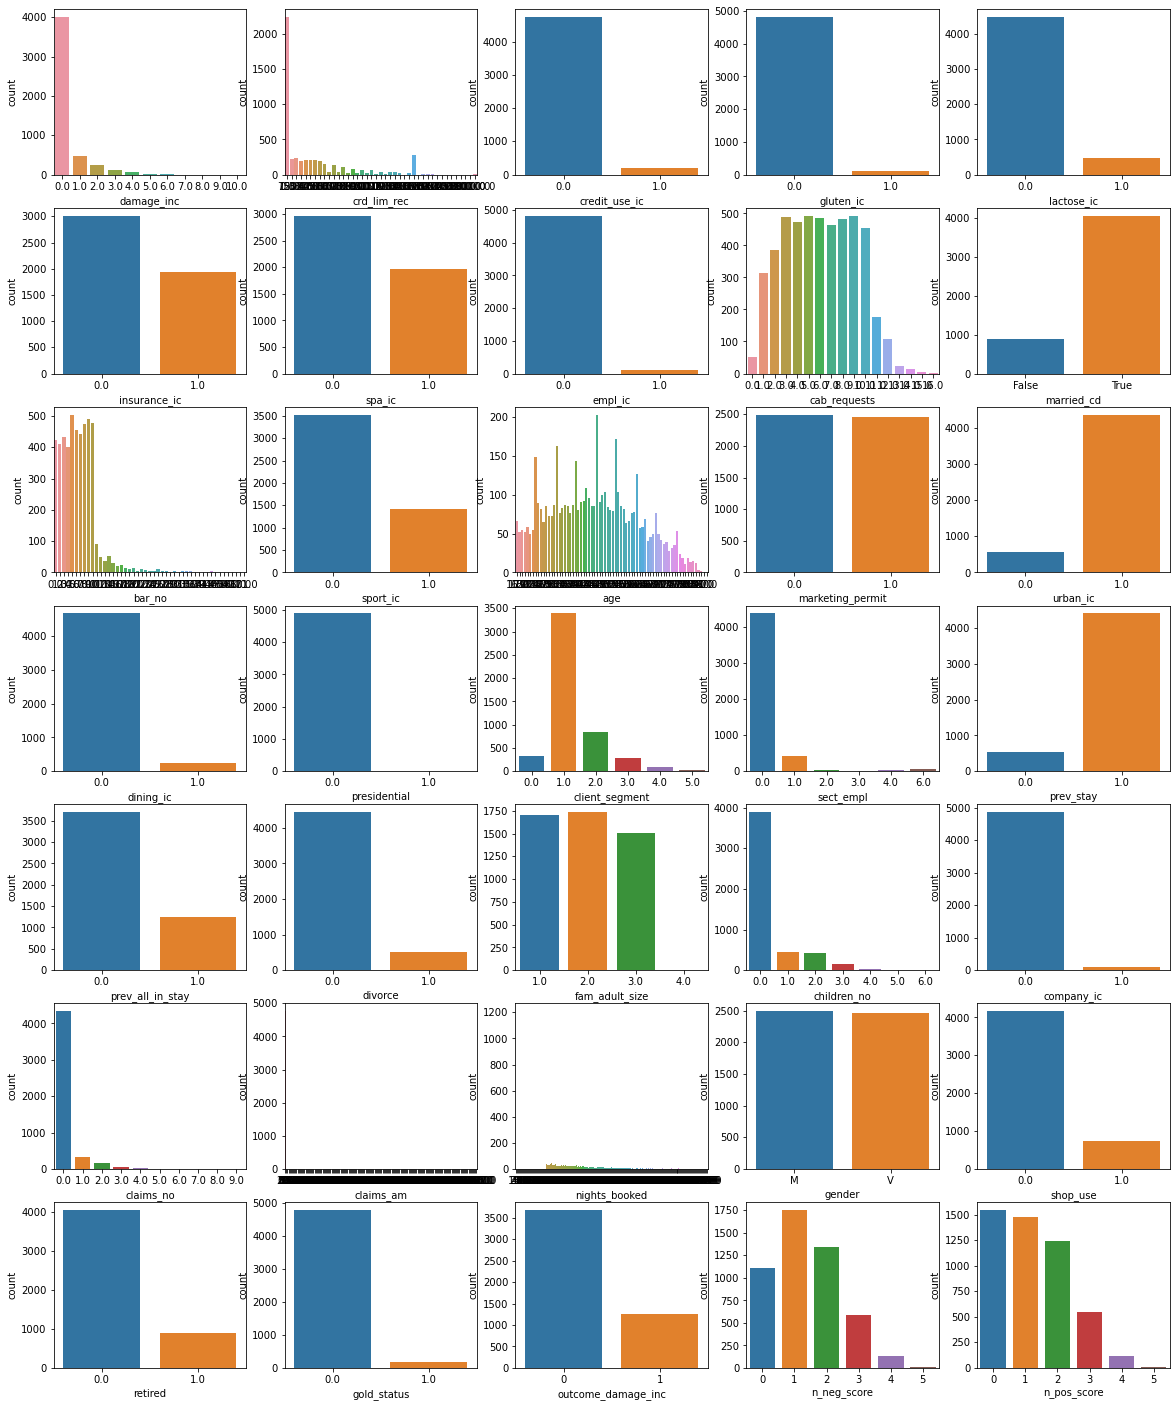

In [416]:
# Obtain categorical variables

id_cat_var = [None] * len(train_dataset_lim2.columns)

for i in range(0, len(train_dataset_lim2.columns)):
    name = train_dataset_lim2.columns[i]
    id_cat_var[i] = train_dataset_lim2[name].nunique()/train_dataset_lim2[name].count() < 0.05
    
print("There are", sum(id_cat_var), "categorical/binary variables.")

col_names_cat_var = train_dataset_lim2.columns[id_cat_var]


# plots 

plot_row_index = np.repeat([0,1,2,3,4, 5, 6], 5)
plot_col_index = np.tile([0,1,2,3,4], 7)
fig, ax = plt.subplots(7,5, figsize =(20, 25))

for i in range(0, sum(id_cat_var)):
    sns.countplot(x = col_names_cat_var[i], data = train_dataset_lim2, ax = ax[plot_row_index[i],plot_col_index[i]])


The way the categorical variables are encoded is important for the algorithms/models that we will use later. According to the documentation, scikit_learn requires the categorical variables to be one-hot encoded. This has the advantage that, when using tree based methods, it is not possible to make splits at impossible values (for example at client_segment = 2.5). However, when categorical variables have many levels, this will result in an equal amount of dummy variables. By introducing many dummy variables, sparsity is also introduced into the model, which is not good. 

Therefore we decided to do the following:
- binary variables: one-hot encoding
- categorical variables with non-numeric data and limited number of levels: one-hot encoding
- categorical variables with numeric data and many levels: consider as continuous data

Concretely this means applying one-hot encoding to:
- binary variables: "gender", "married"
- categorical variables: 'client_segment' (6), 'sect_empl' (6)
- numerical variables with limited number of unique values: 'damage_inc' (10), 'claims_no' (9), 'fam_adult_size' (4), 'children_no' (6), 'n_pos_score' (6) and n_neg_score(6)


Before doing this, lets look at the categorical variables with multiple levels more in depth by plotting profit outcome histograms within each level of the variable.


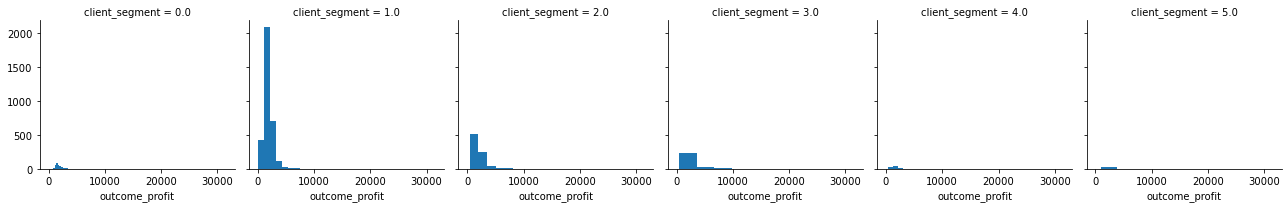

In [417]:
# Client segment 
client_seg = sns.FacetGrid(train_dataset_lim2, col="client_segment")
client_seg.map(plt.hist, "outcome_profit");

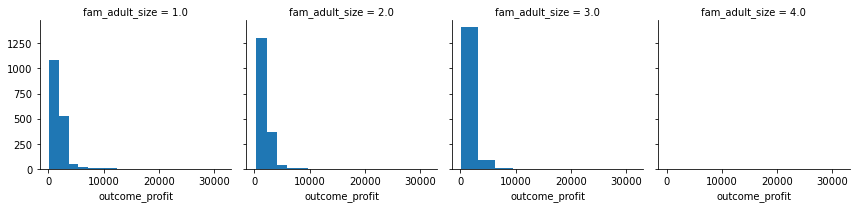

In [418]:
# Familiy adult size 
fam_ad_siz = sns.FacetGrid(train_dataset_lim, col="fam_adult_size")
fam_ad_siz.map(plt.hist, "outcome_profit");

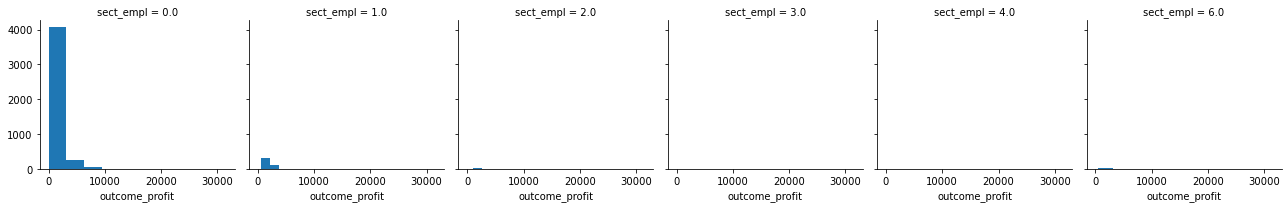

In [419]:
# Sector
sect_empl = sns.FacetGrid(train_dataset_lim, col="sect_empl")
sect_empl.map(plt.hist, "outcome_profit");

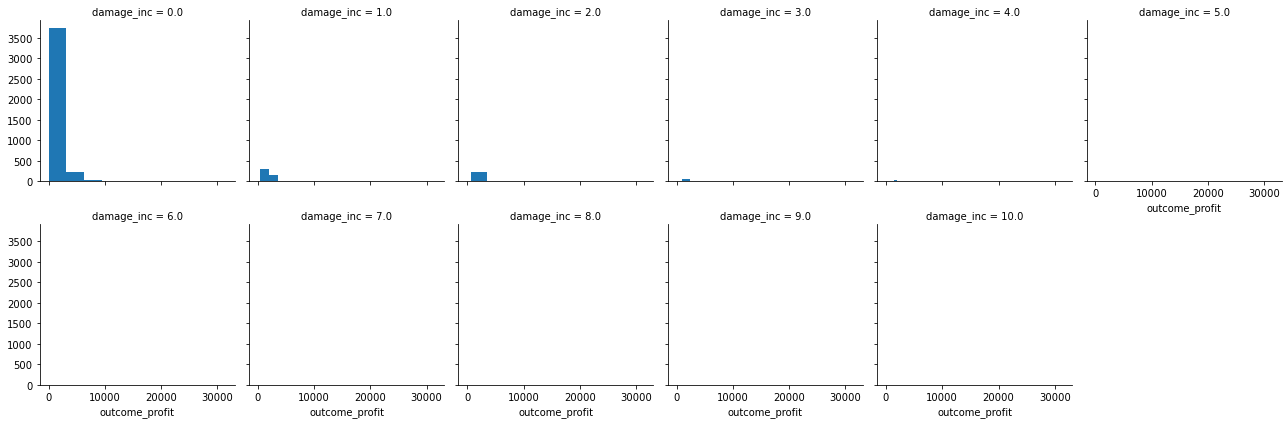

In [420]:
# Damage incidents
damage_inc = sns.FacetGrid(train_dataset_lim, col="damage_inc", col_wrap=6)
damage_inc.map(plt.hist, "outcome_profit");

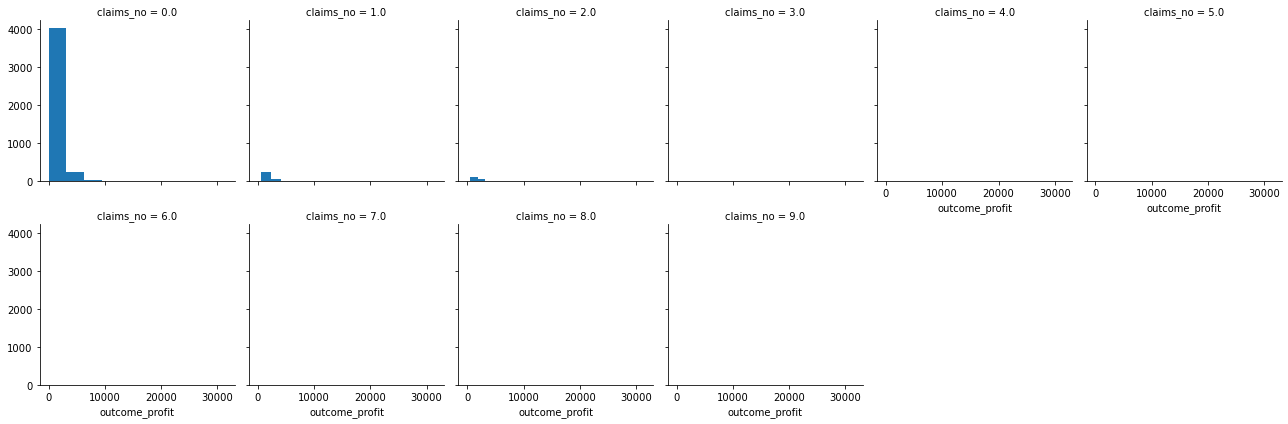

In [421]:
# Number of claims
claims_no = sns.FacetGrid(train_dataset_lim, col="claims_no", col_wrap=6)
claims_no.map(plt.hist, "outcome_profit");

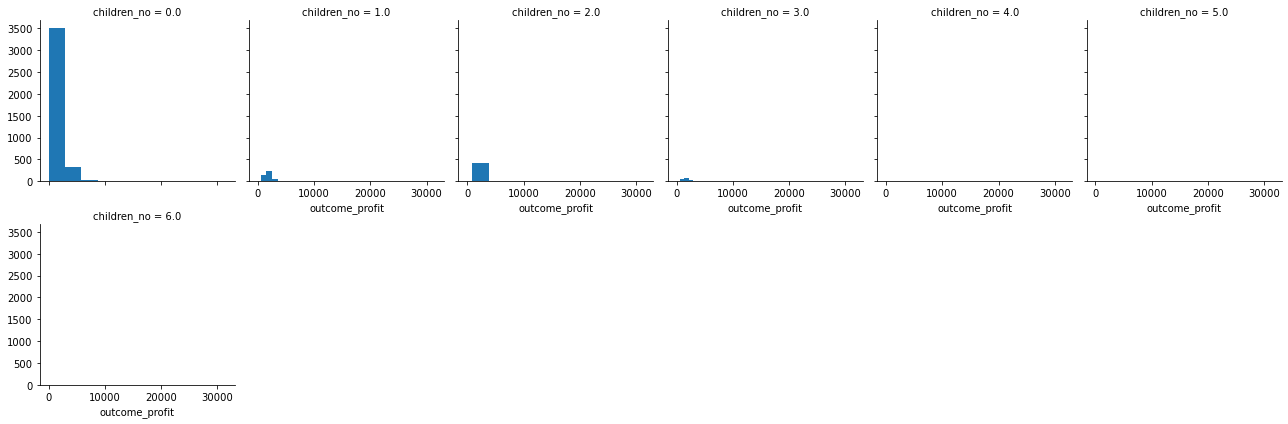

In [422]:
# Number of children
child_no = sns.FacetGrid(train_dataset_lim, col="children_no", col_wrap=6)
child_no.map(plt.hist, "outcome_profit");

In ideal circumstances, it would be possible to discuss with the hotel management which levels of the categorical variables could be grouped together from a business perspective. Only based on the plots, it may be a good idea to make following groups for following variables:

- sector: 0, 1, 2, 3-4-6 
- number of damage incidents: 0, 1, 2, 3 or more
- number of children: 0, 1, 2, 3 or more
- number of claims: 0, 1, 2, 3 or more

However, as we don't have any background knowledge, we are not sure if these groupings would be meaningful. Therefore, we decided to don't do any grouping and leave the number of levels as they are. This does mean that if we apply one-hot-encoding, that we will create quit a lot of dummy variables. 



In the code below, we apply one-hot-encoding to the variables. 

In [423]:
# First, we'll take a look at the once that are already binary, but need to be recoded to a 0/1 coding scheme

train_dataset_lim2['married_cd'] = train_dataset_lim2['married_cd'].astype('str')
train_dataset_lim2['gender'] = train_dataset_lim2['gender'].astype('str')
train_dataset_lim2['fam_adult_size'] = train_dataset_lim2['fam_adult_size'].astype('str')
train_dataset_lim2['married_cd'] = train_dataset_lim2['married_cd'].replace({'False':0,'True':1})
train_dataset_lim2['gender'] = train_dataset_lim2['gender'].replace({'M':0,'V':1})
train_dataset_lim2['fam_adult_size'] = train_dataset_lim2['fam_adult_size'].replace({'0':0,'1':1, 
                                                                             '2':2, '3': 3, '4':3})

# Make variables categorical 

train_dataset_lim2['client_segment'] = pd.Categorical(train_dataset_lim2['client_segment'])
train_dataset_lim2['sect_empl'] = pd.Categorical(train_dataset_lim2['sect_empl'])
train_dataset_lim2['damage_inc'] = pd.Categorical(train_dataset_lim2['damage_inc'])
train_dataset_lim2['claims_no'] = pd.Categorical(train_dataset_lim2['claims_no'])
train_dataset_lim2['fam_adult_size'] = pd.Categorical(train_dataset_lim2['fam_adult_size'])
train_dataset_lim2['children_no'] = pd.Categorical(train_dataset_lim2['children_no'])
train_dataset_lim2['n_pos_score'] = pd.Categorical(train_dataset_lim2['n_pos_score'])
train_dataset_lim2['n_neg_score'] = pd.Categorical(train_dataset_lim2['n_neg_score'])


# One-hot encoding

train_data_dummies = pd.get_dummies(train_dataset_lim2[['client_segment', 
                                                        'sect_empl', 
                                                        'damage_inc', 
                                                        'claims_no', 
                                                        'fam_adult_size', 
                                                        'children_no',
                                                        'n_pos_score', 
                                                        'n_neg_score']])
train_data_dummies.head()



# Add dummy variables

train_dataset_dum = pd.concat([train_dataset_lim2, train_data_dummies], axis = 1)
train_dataset_dum


# Remove original variables

train_dataset_dum.drop(['client_segment',
                        'sect_empl', 
                        'damage_inc',
                        'claims_no', 
                        'fam_adult_size', 
                        'children_no', 
                        'n_pos_score', 
                        'n_neg_score'],
                       axis = 1,
                       inplace = True)

print(train_dataset_dum.shape)
train_dataset_dum.head(5)

(4947, 96)


,income_am,profit_last_am,profit_am,damage_am,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,prev_stay,prev_all_in_stay,divorce,tenure_mts,company_ic,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,outcome_profit_per_night,outcome_damage_per_night,average_neg_score,average_pos_score,client_segment_0.0,client_segment_1.0,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0,damage_inc_0.0,damage_inc_1.0,damage_inc_2.0,damage_inc_3.0,damage_inc_4.0,damage_inc_5.0,damage_inc_6.0,damage_inc_7.0,damage_inc_8.0,damage_inc_9.0,damage_inc_10.0,claims_no_0.0,claims_no_1.0,claims_no_2.0,claims_no_3.0,claims_no_4.0,claims_no_5.0,claims_no_6.0,claims_no_7.0,claims_no_8.0,claims_no_9.0,fam_adult_size_1.0,fam_adult_size_2.0,fam_adult_size_3.0,fam_adult_size_4.0,children_no_0.0,children_no_1.0,children_no_2.0,children_no_3.0,children_no_4.0,children_no_5.0,children_no_6.0,n_pos_score_0,n_pos_score_1,n_pos_score_2,n_pos_score_3,n_pos_score_4,n_pos_score_5,n_neg_score_0,n_neg_score_1,n_neg_score_2,n_neg_score_3,n_neg_score_4,n_neg_score_5
0,227.0,0.0,3201.0,888.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,476.0,0.0,0.0,209.0,0,0.000000,0.0,0.0,0.0,1791.66,0,0.00,8.572536,0.000,0.532814,0.652958,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,268.0,16.0,1682.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,1,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,4.0,0,0.000000,0.0,0.0,0.0,1672.78,1,829.66,418.195000,207.415,0.813600,NaN,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,283.0,23.0,1673.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,95.0,0.0,0.0,6.0,0,0.000000,0.0,0.0,0.0,1001.40,0,0.00,166.900000,0.000,0.113213,0.167165,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,4.0,1,0.000000,0.0,0.0,0.0,1785.59,0,0.00,446.397500,0.000,0.889793,NaN,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,4091.0,1028.0,3425.0,785.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,354.0,0.0,0.0,3.0,1,1454.210627,1.0,0.0,0.0,3140.74,0,0.00,1046.913333,0.000,0.654370,0.410495,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


After applying the feating engineering of the categorical variables, we now have a dataset of 4947 observations with 96 variables.

## **Part 4b: standardising continuous variables**

Before we move on to imputation and the identification of outliers, we first standardise the continuous features from the dataset. It is necessary to this upfront since the two algorithms we wil be using, KNN imputation and isolation forests, need standardised data in order to perform well (as these are based on a distance metric).

In [424]:
# list of continuous variables 

cont_var = ['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'crd_lim_rec', 
            'cab_requests', 'bar_no', 'neighbor_income', 'age', 'tenure_mts', 'nights_booked',
            'shop_am', 'average_neg_score', 'average_pos_score']

In [425]:
scaler = StandardScaler()
train_dataset_dum[cont_var] = scaler.fit_transform(train_dataset_dum[cont_var])

In [426]:
train_dataset_dum.head(n=10)

,income_am,profit_last_am,profit_am,damage_am,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,prev_stay,prev_all_in_stay,divorce,tenure_mts,company_ic,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,outcome_profit_per_night,outcome_damage_per_night,average_neg_score,average_pos_score,client_segment_0.0,client_segment_1.0,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0,damage_inc_0.0,damage_inc_1.0,damage_inc_2.0,damage_inc_3.0,damage_inc_4.0,damage_inc_5.0,damage_inc_6.0,damage_inc_7.0,damage_inc_8.0,damage_inc_9.0,damage_inc_10.0,claims_no_0.0,claims_no_1.0,claims_no_2.0,claims_no_3.0,claims_no_4.0,claims_no_5.0,claims_no_6.0,claims_no_7.0,claims_no_8.0,claims_no_9.0,fam_adult_size_1.0,fam_adult_size_2.0,fam_adult_size_3.0,fam_adult_size_4.0,children_no_0.0,children_no_1.0,children_no_2.0,children_no_3.0,children_no_4.0,children_no_5.0,children_no_6.0,n_pos_score_0,n_pos_score_1,n_pos_score_2,n_pos_score_3,n_pos_score_4,n_pos_score_5,n_neg_score_0,n_neg_score_1,n_neg_score_2,n_neg_score_3,n_neg_score_4,n_neg_score_5
0,-0.245595,-0.228155,-0.076301,1.275968,2.572171,0.0,0.0,0.0,0.0,1.0,0.0,-0.980628,1,-0.721744,1.0,-0.560307,-0.487020,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.330574,0.0,0.0,4.803181,0,-0.301707,0.0,0.0,0.0,1791.66,0,0.00,8.572536,0.000000,0.135239,0.626889,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.240694,-0.222910,-0.341580,-0.251395,-0.560258,0.0,0.0,0.0,1.0,1.0,0.0,0.304807,1,-0.523802,0.0,-2.348305,-1.658164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.614038,0.0,0.0,-0.666881,0,-0.301707,0.0,0.0,0.0,1672.78,1,829.66,418.195000,207.415000,1.295661,NaN,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,-0.238900,-0.220616,-0.343151,-0.251395,-0.560258,0.0,0.0,0.0,1.0,0.0,0.0,-1.623346,1,-0.325861,0.0,-0.033036,-1.473247,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.168083,0.0,0.0,-0.613515,0,-0.301707,0.0,0.0,0.0,1001.40,0,0.00,166.900000,0.000000,-1.598869,-1.332035,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,-0.245595,-0.228155,-0.341056,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,0.0,-0.016552,1,0.465904,1.0,-0.076781,-0.487020,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,-0.666881,1,-0.301707,0.0,0.0,0.0,1785.59,0,0.00,446.397500,0.000000,1.610545,NaN,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0.216362,0.108805,-0.037181,1.098807,2.352351,0.0,0.0,1.0,0.0,1.0,0.0,-0.659270,0,-0.721744,1.0,-0.462756,-1.165051,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.530479,0.0,0.0,-0.693564,1,0.786937,1.0,0.0,0.0,3140.74,0,0.00,1046.913333,0.000000,0.637600,-0.350825,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5,0.337949,-0.133426,0.461418,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,0.0,-0.980628,0,0.070022,0.0,-0.752055,2.410020,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.504247,0.0,0.0,-0.666881,1,-0.301707,0.0,1.0,1.0,4318.76,0,0.00,1079.690000,0.000000,0.521828,0.602615,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6,1.316499,-0.218977,1.932590,-0.251395,2.572171,0.0,1.0,1.0,1.0,1.0,0.0,0.626165,1,2.445317,0.0,0.099219,0.067732,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.333734,0.0,0.0,1.414411,0,-0.301707,0.0,0.0,1.0,1676.75,1,888.09,20.448171,10.830366,1.545324,0.338036,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7,-0.245595,-0.228155,-0.352407,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.663846,0.0,-0.538289,0.

## **Part 4c: Impute missing values using KNN imputation algorithm**


There are still missing values for a couple of variables. Let's impute these missing values by using the KNN imputation algorithm. We choose k = 50 quit arbitrarily. The continuous variables are already standardised, so these are no issue anymore for the distance metric used in the algorithm. 

In [429]:
imputer = KNN(k = 51)

for cols in ['average_pos_score',
             'average_neg_score',
             'tenure_mts', 
             'neighbor_income',
             'presidential',
             'cab_requests', 
             'shop_use', 
             'dining_ic']: 
    
    train_dataset_dum[cols] = imputer.fit_transform(train_dataset_dum[[cols]])

Imputing row 1/4947 with 0 missing, elapsed time: 2.538
Imputing row 101/4947 with 0 missing, elapsed time: 2.539
Imputing row 201/4947 with 0 missing, elapsed time: 2.540
Imputing row 301/4947 with 1 missing, elapsed time: 2.540
Imputing row 401/4947 with 0 missing, elapsed time: 2.541
Imputing row 501/4947 with 0 missing, elapsed time: 2.541
Imputing row 601/4947 with 1 missing, elapsed time: 2.542
Imputing row 701/4947 with 1 missing, elapsed time: 2.543
Imputing row 801/4947 with 0 missing, elapsed time: 2.543
Imputing row 901/4947 with 1 missing, elapsed time: 2.544
Imputing row 1001/4947 with 0 missing, elapsed time: 2.545
Imputing row 1101/4947 with 0 missing, elapsed time: 2.545
Imputing row 1201/4947 with 1 missing, elapsed time: 2.546
Imputing row 1301/4947 with 0 missing, elapsed time: 2.546
Imputing row 1401/4947 with 0 missing, elapsed time: 2.547
Imputing row 1501/4947 with 1 missing, elapsed time: 2.547
Imputing row 1601/4947 with 0 missing, elapsed time: 2.549
Imputing 

Imputing row 1/4947 with 0 missing, elapsed time: 2.731
Imputing row 101/4947 with 0 missing, elapsed time: 2.731
Imputing row 201/4947 with 0 missing, elapsed time: 2.731
Imputing row 301/4947 with 1 missing, elapsed time: 2.732
Imputing row 401/4947 with 0 missing, elapsed time: 2.732
Imputing row 501/4947 with 0 missing, elapsed time: 2.732
Imputing row 601/4947 with 1 missing, elapsed time: 2.733
Imputing row 701/4947 with 0 missing, elapsed time: 2.733
Imputing row 801/4947 with 0 missing, elapsed time: 2.734
Imputing row 901/4947 with 0 missing, elapsed time: 2.734
Imputing row 1001/4947 with 0 missing, elapsed time: 2.734
Imputing row 1101/4947 with 0 missing, elapsed time: 2.735
Imputing row 1201/4947 with 0 missing, elapsed time: 2.735
Imputing row 1301/4947 with 0 missing, elapsed time: 2.735
Imputing row 1401/4947 with 0 missing, elapsed time: 2.736
Imputing row 1501/4947 with 0 missing, elapsed time: 2.736
Imputing row 1601/4947 with 0 missing, elapsed time: 2.736
Imputing 

Imputing row 1/4947 with 0 missing, elapsed time: 1.665
Imputing row 101/4947 with 0 missing, elapsed time: 1.665
Imputing row 201/4947 with 0 missing, elapsed time: 1.666
Imputing row 301/4947 with 0 missing, elapsed time: 1.666
Imputing row 401/4947 with 0 missing, elapsed time: 1.666
Imputing row 501/4947 with 0 missing, elapsed time: 1.667
Imputing row 601/4947 with 0 missing, elapsed time: 1.667
Imputing row 701/4947 with 0 missing, elapsed time: 1.667
Imputing row 801/4947 with 0 missing, elapsed time: 1.668
Imputing row 901/4947 with 0 missing, elapsed time: 1.668
Imputing row 1001/4947 with 0 missing, elapsed time: 1.668
Imputing row 1101/4947 with 0 missing, elapsed time: 1.668
Imputing row 1201/4947 with 0 missing, elapsed time: 1.669
Imputing row 1301/4947 with 0 missing, elapsed time: 1.669
Imputing row 1401/4947 with 0 missing, elapsed time: 1.669
Imputing row 1501/4947 with 1 missing, elapsed time: 1.670
Imputing row 1601/4947 with 0 missing, elapsed time: 1.670
Imputing 

In [430]:
total = train_dataset_dum.isnull().sum().sort_values(ascending=False)
percent = (train_dataset_dum.isnull().sum()/train_dataset_dum.isnull().count()).sort_values(ascending=False)
missing_data_improw = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_improw.head(53)

,Total,Percent
n_neg_score_5,0,0.0
n_neg_score_4,0,0.0
company_ic,0,0.0
claims_am,0,0.0
nights_booked,0,0.0
gender,0,0.0
shop_am,0,0.0
shop_use,0,0.0
retired,0,0.0
gold_status,0,0.0


# **Part 5: Outlier detection by means of isolation forests**

In the previous steps, the data has been cleaned, standardised and imputed. Now, we will try to flag any outliers. For this, we will use the isolation forest algoritm. We will let the algoritm search for outliers, in stead of forcing to pick a certain percentage of outliers. Thereafter, we will perform an analysis whether these outliers should be kept in the model, or discarded.

In [431]:
# Isolation forest algorithm
rng = np.random.RandomState(254)
isolf = IsolationForest(n_estimators=50, random_state=rng)
isolf.fit(train_dataset_dum)
y_pred_train_isol = isolf.predict(train_dataset_dum)

In [432]:
# Count number of outliers
pd.Series(y_pred_train_isol).value_counts()

 1    4605
-1     342
dtype: int64

In [433]:
# Check percentage of outliers 
pd.Series(y_pred_train_isol).value_counts()[-1] / pd.Series(y_pred_train_isol).value_counts().sum()

0.06913280776228017

Around 7 percent of outliers have been detected. Since we are unsure whether these outliers are false observations or real outliers, we create a seperate dataset. We will later train a model on both datasets and select the best model thereof.

In [434]:
# Create seperate datasets 

# with outliers 

train_dataset_dum.loc[:,'isol'] = pd.Series(y_pred_train_isol, index = train_dataset_dum.index)
train_dataset_dum.shape
display(train_dataset_dum.head(5))

# without outliers 

train_no_outliers = copy.copy(train_dataset_dum[train_dataset_dum['isol'] == 1])
train_no_outliers.drop('isol', inplace = True, axis = 1)
train_no_outliers.shape
display(train_no_outliers.head(5))

,income_am,profit_last_am,profit_am,damage_am,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,prev_stay,prev_all_in_stay,divorce,tenure_mts,company_ic,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,outcome_profit_per_night,outcome_damage_per_night,average_neg_score,average_pos_score,client_segment_0.0,client_segment_1.0,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0,damage_inc_0.0,damage_inc_1.0,damage_inc_2.0,damage_inc_3.0,damage_inc_4.0,damage_inc_5.0,damage_inc_6.0,damage_inc_7.0,damage_inc_8.0,damage_inc_9.0,damage_inc_10.0,claims_no_0.0,claims_no_1.0,claims_no_2.0,claims_no_3.0,claims_no_4.0,claims_no_5.0,claims_no_6.0,claims_no_7.0,claims_no_8.0,claims_no_9.0,fam_adult_size_1.0,fam_adult_size_2.0,fam_adult_size_3.0,fam_adult_size_4.0,children_no_0.0,children_no_1.0,children_no_2.0,children_no_3.0,children_no_4.0,children_no_5.0,children_no_6.0,n_pos_score_0,n_pos_score_1,n_pos_score_2,n_pos_score_3,n_pos_score_4,n_pos_score_5,n_neg_score_0,n_neg_score_1,n_neg_score_2,n_neg_score_3,n_neg_score_4,n_neg_score_5,isol
0,-0.245595,-0.228155,-0.076301,1.275968,2.572171,0.0,0.0,0.0,0.0,1.0,0.0,-0.980628,1,-0.721744,1.0,-0.560307,-0.487020,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.330574,0.0,0.0,4.803181,0,-0.301707,0.0,0.0,0.0,1791.66,0,0.00,8.572536,0.000,0.135239,0.626889,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,-0.240694,-0.222910,-0.341580,-0.251395,-0.560258,0.0,0.0,0.0,1.0,1.0,0.0,0.304807,1,-0.523802,0.0,-2.348305,-1.658164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.614038,0.0,0.0,-0.666881,0,-0.301707,0.0,0.0,0.0,1672.78,1,829.66,418.195000,207.415,1.295661,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,-0.238900,-0.220616,-0.343151,-0.251395,-0.560258,0.0,0.0,0.0,1.0,0.0,0.0,-1.623346,1,-0.325861,0.0,-0.033036,-1.473247,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.168083,0.0,0.0,-0.613515,0,-0.301707,0.0,0.0,0.0,1001.40,0,0.00,166.900000,0.000,-1.598869,-1.332035,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,-0.245595,-0.228155,-0.341056,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,0.0,-0.016552,1,0.465904,1.0,-0.076781,-0.487020,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,-0.666881,1,-0.301707,0.0,0.0,0.0,1785.59,0,0.00,446.397500,0.000,1.610545,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0.216362,0.108805,-0.037181,1.098807,2.352351,0.0,0.0,1.0,0.0,1.0,0.0,-0.659270,0,-0.721744,1.0,-0.462756,-1.165051,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.530479,0.0,0.0,-0.693564,1,0.786937,1.0,0.0,0.0,3140.74,0,0.00,1046.913333,0.000,0.637600,-0.350825,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


,income_am,profit_last_am,profit_am,damage_am,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,prev_stay,prev_all_in_stay,divorce,tenure_mts,company_ic,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,outcome_profit_per_night,outcome_damage_per_night,average_neg_score,average_pos_score,client_segment_0.0,client_segment_1.0,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0,damage_inc_0.0,damage_inc_1.0,damage_inc_2.0,damage_inc_3.0,damage_inc_4.0,damage_inc_5.0,damage_inc_6.0,damage_inc_7.0,damage_inc_8.0,damage_inc_9.0,damage_inc_10.0,claims_no_0.0,claims_no_1.0,claims_no_2.0,claims_no_3.0,claims_no_4.0,claims_no_5.0,claims_no_6.0,claims_no_7.0,claims_no_8.0,claims_no_9.0,fam_adult_size_1.0,fam_adult_size_2.0,fam_adult_size_3.0,fam_adult_size_4.0,children_no_0.0,children_no_1.0,children_no_2.0,children_no_3.0,children_no_4.0,children_no_5.0,children_no_6.0,n_pos_score_0,n_pos_score_1,n_pos_score_2,n_pos_score_3,n_pos_score_4,n_pos_score_5,n_neg_score_0,n_neg_score_1,n_neg_score_2,n_neg_score_3,n_neg_score_4,n_neg_score_5
0,-0.245595,-0.228155,-0.076301,1.275968,2.572171,0.0,0.0,0.0,0.0,1.0,0.0,-0.980628,1,-0.721744,1.0,-0.560307,-0.487020,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.330574,0.0,0.0,4.803181,0,-0.301707,0.0,0.0,0.0,1791.66,0,0.00,8.572536,0.000,0.135239,0.626889,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.240694,-0.222910,-0.341580,-0.251395,-0.560258,0.0,0.0,0.0,1.0,1.0,0.0,0.304807,1,-0.523802,0.0,-2.348305,-1.658164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.614038,0.0,0.0,-0.666881,0,-0.301707,0.0,0.0,0.0,1672.78,1,829.66,418.195000,207.415,1.295661,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,-0.238900,-0.220616,-0.343151,-0.251395,-0.560258,0.0,0.0,0.0,1.0,0.0,0.0,-1.623346,1,-0.325861,0.0,-0.033036,-1.473247,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.168083,0.0,0.0,-0.613515,0,-0.301707,0.0,0.0,0.0,1001.40,0,0.00,166.900000,0.000,-1.598869,-1.332035,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,-0.245595,-0.228155,-0.341056,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,0.0,-0.016552,1,0.465904,1.0,-0.076781,-0.487020,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,-0.666881,1,-0.301707,0.0,0.0,0.0,1785.59,0,0.00,446.397500,0.000,1.610545,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0.216362,0.108805,-0.037181,1.098807,2.352351,0.0,0.0,1.0,0.0,1.0,0.0,-0.659270,0,-0.721744,1.0,-0.462756,-1.165051,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.530479,0.0,0.0,-0.693564,1,0.786937,1.0,0.0,0.0,3140.74,0,0.00,1046.913333,0.000,0.637600,-0.350825,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


# **Part 6: Model the profit**


## **Part 6A: Dataset with the outliers included**

###### 1. Split in train and test dataset

First, we will split the dataset into a test (20 %) and a train set (80 %) for all the outcome variables.

In [435]:
# Split train-test 

outcome_var = ['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount', 
               'outcome_profit_per_night', 'outcome_damage_per_night', 'isol']


X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(train_dataset_dum.drop(outcome_var,1),
                                                                                train_dataset_dum.outcome_profit,
                                                                                test_size=0.2,
                                                                                random_state=327)

# Check outcome

print(y_train_profit.head(n=10))
X_train_profit.head(n=10)

2281    1787.83
3429    2284.75
4473    1336.03
458     2457.47
63      1674.47
1652    1297.36
2975    1956.12
1096    1796.95
929      903.26
4570    1962.94
Name: outcome_profit, dtype: float64


,income_am,profit_last_am,profit_am,damage_am,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,prev_stay,prev_all_in_stay,divorce,tenure_mts,company_ic,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,average_neg_score,average_pos_score,client_segment_0.0,client_segment_1.0,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0,damage_inc_0.0,damage_inc_1.0,damage_inc_2.0,damage_inc_3.0,damage_inc_4.0,damage_inc_5.0,damage_inc_6.0,damage_inc_7.0,damage_inc_8.0,damage_inc_9.0,damage_inc_10.0,claims_no_0.0,claims_no_1.0,claims_no_2.0,claims_no_3.0,claims_no_4.0,claims_no_5.0,claims_no_6.0,claims_no_7.0,claims_no_8.0,claims_no_9.0,fam_adult_size_1.0,fam_adult_size_2.0,fam_adult_size_3.0,fam_adult_size_4.0,children_no_0.0,children_no_1.0,children_no_2.0,children_no_3.0,children_no_4.0,children_no_5.0,children_no_6.0,n_pos_score_0,n_pos_score_1,n_pos_score_2,n_pos_score_3,n_pos_score_4,n_pos_score_5,n_neg_score_0,n_neg_score_1,n_neg_score_2,n_neg_score_3,n_neg_score_4,n_neg_score_5
2281,0.004392,-0.058692,-0.045389,4.681573,1.253254,0.0,0.0,0.0,1.0,1.0,0.0,-0.659270,1,0.267963,1.0,1.610604,-0.610299,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.971339,0.0,0.0,1.200945,1,0.632612,1.0,0.0,0.0,0.954401,0.000000,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3429,-0.131421,-0.126543,-0.227015,1.091927,1.033434,0.0,0.0,0.0,1.0,0.0,0.0,1.911600,1,1.059728,1.0,-0.212244,-0.117185,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.504247,0.0,0.0,-0.373366,1,-0.301707,0.0,0.0,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4473,-0.245595,-0.228155,-0.330752,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,0.0,1.268883,0,0.663846,1.0,-0.085384,-1.041773,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.590966,0.0,0.0,0.000200,1,-0.301707,0.0,0.0,0.0,2.048563,-0.336400,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
458,0.027945,0.714381,0.369033,1.451408,0.593795,0.0,0.0,0.0,0.0,1.0,0.0,-0.980628,1,-0.325861,1.0,-0.925285,-0.918494,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.832154,0.0,0.0,0.053566,0,2.287428,1.0,0.0,0.0,-0.819648,-1.040180,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
63,-0.244280,-0.228155,-0.308223,-0.191195,-0.395393,0.0,0.0,0.0,1.0,1.0,0.0,-0.337911,1,0.070022,0.0,1.616290,0.252650,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.609415,0.0,586.0,1.280995,1,-0.301707,0.0,0.0,0.0,0.682767,0.062470,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1652,-0.245595,-0.228155,-0.352407,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,1.0,-1.301987,0,-1.117626,0.0,-0.360102,0.437567,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.122176,0.0,0.0,-0.666881,1,-0.301707,0.0,0.0,0.0,-1.193890,0.937957,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2975,-0.245595,-0.228155,-0.352407,-0.251395,-0.725122,0.0,0.0,0.0,0.0,0.0,0.0,-0.659270,1,0.267963,0.0,-0.215889,0.560845,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.622293,0.0,0.0,-0.666881,0,-0.301707,0.0,0.0,0.0,1.741505,-0.340246,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1096,-0.245595,-0.228155,-0.348391,-0.251395,-0.175573,0.0,0.0,0.0,0.0,1.0,0.0,-0.016552,0,-1.117626,0.0,0.834716,1.731989,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.451781,0.0,0.0,0.053566,0,-0.301707,0.0,1.0,0.0,0.111972,0.120027,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
929,-0.244758,-0.228155,-0.346819,-0.251395,-0.395393,0.0,0.0,0.0,1.0,0.0,0.0,-0.337911,1,-1.117626,0

###### 2. Reference: random forest with random choice of hyperparameters

Next, we will train a random forest. To get a first look, we will just run one model with random hyperparameters.

In [437]:
# Take another look at how many predictors there are in the model
len(X_train_profit.columns)

91

In [489]:
rf_rand = RandomForestRegressor(n_estimators = 1000, 
                                oob_score = True, 
                                n_jobs = -1,
                                random_state =65484, 
                                max_depth=9,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                max_features="auto")

rf_rand.fit(X_train_profit, y_train_profit)
print('Train R2: %.3f' % rf_rand.score(X_train_profit, np.array(y_train_profit).reshape(-1,1)))
print('Test R2: %.3f' % rf_rand.score(X_test_profit, np.array(y_test_profit).reshape(-1,1)))




Train R2: 0.900
Test R2: 0.742


Train R² = 0.9, which is an ok first score and gives us a benchmark for futher modelling. Lets now do a grid search to get good values for the hyperparameters. 


###### 3. Grid search hyperparameters 

In [442]:
# Define grid

n_estimators = [int(x) for x in np.linspace(start = 2, stop = 500, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]


# create the random grid to search for best hyperparameters

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# then create the base model to tune

rf = RandomForestRegressor()


# random search of parameters, using 3 fold cross validation, across 500 different hyperparameter combinations, and use all available cores

rf_grids = RandomizedSearchCV(estimator = rf, 
                              param_distributions = random_grid, 
                              n_iter = 500,
                              cv = 3, 
                              verbose=4,
                              random_state=42, 
                              n_jobs = -1)


# Fit the random search model

rf_grids.fit(X_train_profit, y_train_profit)
rf_grids.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 47.9min finished


{'n_estimators': 296,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 189,
 'bootstrap': True}

Build a model with the hyperparameters that we found via the random grid search and check the R²-values.

In [444]:
# Build model 

params = rf_grids.best_params_
rf_grid_par = RandomForestRegressor(**params)
rf_grid_par.fit(X_train_profit, y_train_profit)
print('Train R2: %.3f' % rf_grid_par.score(X_train_profit, y_train_profit))
print('Test R2: %.3f' % rf_grid_par.score(X_test_profit, y_test_profit))

R2: 0.955
R2: 0.749


###### 4. Cross-validation results

Lets have a look at the influence of the different hyperparameters on the test values.


In [447]:
# cross validation results model 1
res_mod1 = pd.DataFrame(rf_grids.cv_results_)
res_mod1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.189285,0.032099,0.210448,0.007363,459,2,2,log2,85,True,"{'n_estimators': 459, 'min_samples_split': 2, ...",0.396283,0.367696,0.405014,0.389664,0.015938,343
1,0.310386,0.002887,0.019099,0.004918,103,10,2,sqrt,2,True,"{'n_estimators': 103, 'min_samples_split': 10,...",0.116075,0.149829,0.204797,0.156900,0.036564,482
2,4.099232,0.113829,0.210123,0.041897,367,10,2,sqrt,95,False,"{'n_estimators': 367, 'min_samples_split': 10,...",0.485428,0.451722,0.470473,0.469208,0.013789,221
3,1.286410,0.026706,0.066524,0.017920,154,10,2,sqrt,33,True,"{'n_estimators': 154, 'min_samples_split': 10,...",0.470150,0.407699,0.440505,0.439451,0.025506,267
4,3.393921,0.046894,0.167552,0.013602,449,10,10,sqrt,None,True,"{'n_estimators': 449, 'min_samples_split': 10,...",0.366901,0.356160,0.347993,0.357018,0.007743,407


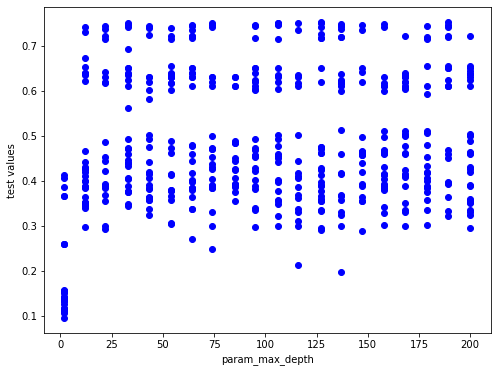

In [462]:
# param_max_depth

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1['param_max_depth'], res_mod1['mean_test_score'], c='blue');
ax.set_xlabel("param_max_depth");
ax.set_ylabel("test values");

Although the optimal depth is 189, also forest which are less deep, have good results. Only the really low depth trees have worse results.

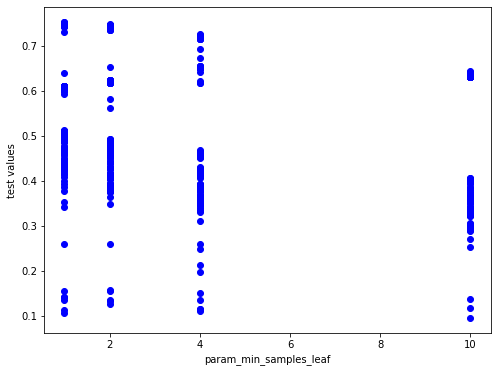

In [463]:
# param_min_samples_leaf
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1['param_min_samples_leaf'], res_mod1['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_leaf");
ax.set_ylabel("test values");

The algoritm shifts to a very low samples per leave parameter. The optimal parameter here is 1, but higher value have similar power.


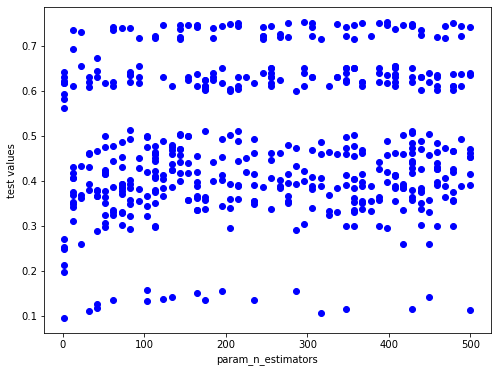

In [464]:
# param_n_estimators 
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1['param_n_estimators'], res_mod1['mean_test_score'], c='blue');
ax.set_xlabel("param_n_estimators");
ax.set_ylabel("test values");

Again, a high optimal number of estimators, however, low values have similar results.

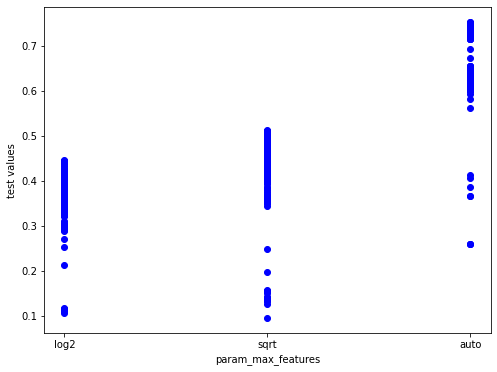

In [465]:
# param_max_features
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1['param_max_features'], res_mod1['mean_test_score'], c='blue');
ax.set_xlabel("param_max_features");
ax.set_ylabel("test values");

The 'auto' search is by far the best.


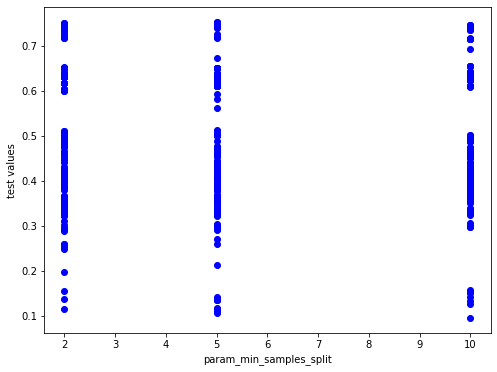

In [466]:
# param_min_samples_split
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1['param_min_samples_split'], res_mod1['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_split");
ax.set_ylabel("test values");

Based on our findings from above, we can narrow our grid and do a new grid search. 


In [469]:
# Define narrow grid

n_estimators = [int(x) for x in np.linspace(50, 500, num = 5)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(20, 150, num = 5)]
max_depth.append(None)
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True]


param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Grid search 

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=4, n_jobs = -1)
grid_search.fit(X_train_profit, y_train_profit)
grid_search.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 46.7min finished


{'bootstrap': True,
 'max_depth': 150,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 275}

Next, we will build a model based on the found values for the hyperparameters and check the R²-values for the train and test dataset. 

In [470]:
params = grid_search.best_params_
rf_grid = RandomForestRegressor(**params)
rf_grid.fit(X_train_profit, y_train_profit)
print('Train R2: %.3f' % rf_grid.score(X_train_profit, y_train_profit))
print('Test R2: %.3f' % rf_grid.score(X_test_profit, y_test_profit))

Train R2: 0.967
Test R2: 0.749


The R²-value for the train and test dataset are 0.967 and 0.749 respectively. The difference between the two is an indication that there is quit some overfitting. 

## **Part 6B: Dataset without the outliers**

First, lets check the shape of the dataset without outliers and split in a train and test set again. 

In [475]:
# Shape 

print(train_no_outliers.shape)


# Split in train and test set

outcome_var = ['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount', 
               'outcome_profit_per_night', 'outcome_damage_per_night']

X_train_profit_out, X_test_profit_out, y_train_profit_out, y_test_profit_out = train_test_split(train_no_outliers.drop(outcome_var,1),
                                                                                                train_no_outliers.outcome_profit,
                                                                                                test_size=0.2,
                                                                                                random_state=327)

(4605, 96)


We will follow the same steps as before:
- random search on wider grid of hyperparameters
- check influence of hyperparameters on performance of the model
- narrow the grid of hyperparameters 
- run a new grid search
- fit final model


In [476]:
# Set of hyperparameters 

n_estimators = [int(x) for x in np.linspace(start = 2, stop = 500, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]


# create the random grid to search for best hyperparameters

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# then create the base model to tune

rf = RandomForestRegressor()


# random search of parameters, using 3 fold cross validation, across 500 different hyperparameter combinations, and use all available cores

rf_grids_out = RandomizedSearchCV(estimator = rf, 
                                  param_distributions = random_grid, 
                                  n_iter = 500, 
                                  cv = 3,
                                  verbose=2,
                                  random_state=42,
                                  n_jobs = -1)

# Fit the random search model
rf_grids_out.fit(X_train_profit_out, y_train_profit_out)
rf_grids_out.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 38.5min finished


{'n_estimators': 398,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 127,
 'bootstrap': True}

In [477]:
# check R²-values 
params_out = rf_grids_out.best_params_
rf_grid_no = RandomForestRegressor(**params_out)
rf_grid_no.fit(X_train_profit_out, y_train_profit_out)
print('Train R2: %.3f' % rf_grid_no.score(X_train_profit_out, y_train_profit_out))
print('Test R2: %.3f' % rf_grid_no.score(X_test_profit_out, y_test_profit_out))

Train R2: 0.942
Test R2: 0.637


In [478]:
# Cross validation results
res_mod1_no = pd.DataFrame(rf_grids_out.cv_results_)

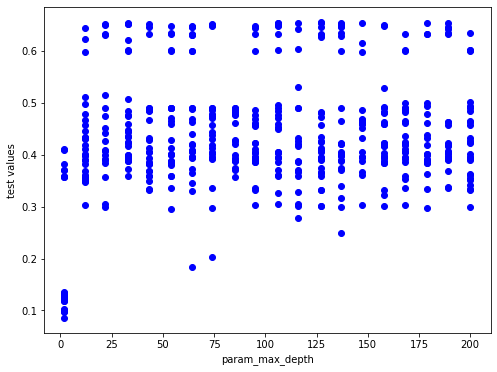

In [479]:
# param_max_depth 
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_no['param_max_depth'], res_mod1_no['mean_test_score'], c='blue');
ax.set_xlabel("param_max_depth");
ax.set_ylabel("test values");

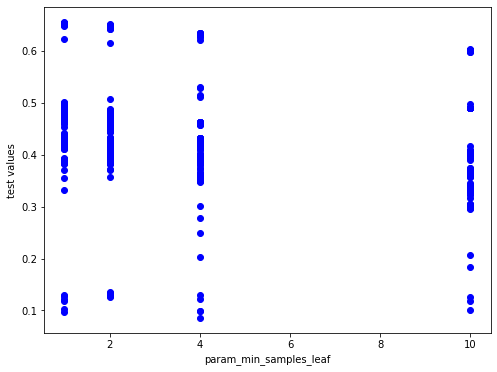

In [480]:
# param_min_samples_leaf
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_no['param_min_samples_leaf'], res_mod1_no['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_leaf");
ax.set_ylabel("test values");

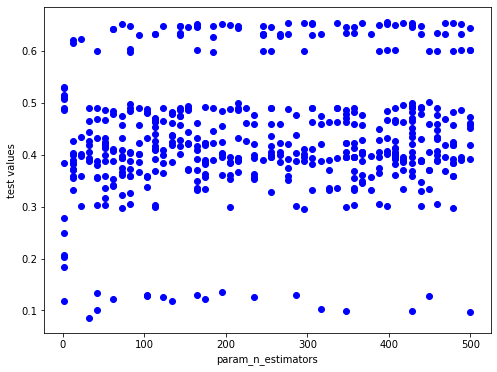

In [481]:
# param_n_estimators
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_no['param_n_estimators'], res_mod1_no['mean_test_score'], c='blue');
ax.set_xlabel("param_n_estimators");
ax.set_ylabel("test values");

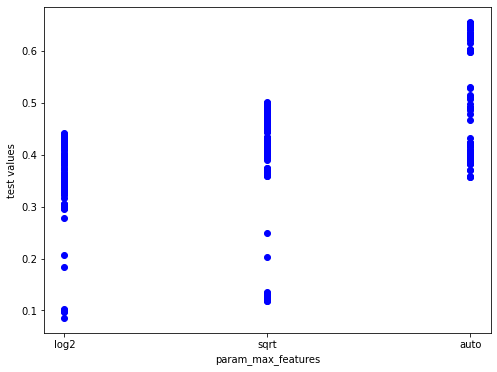

In [482]:
# param_max_features
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_no['param_max_features'], res_mod1_no['mean_test_score'], c='blue');
ax.set_xlabel("param_max_features");
ax.set_ylabel("test values");

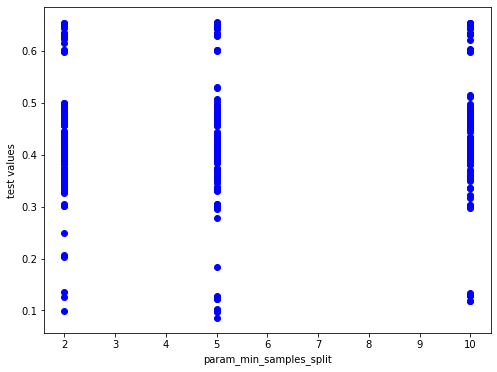

In [483]:
# param_min_samples_split
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_no['param_min_samples_split'], res_mod1_no['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_split");
ax.set_ylabel("test values");

In [484]:
# Narrow grid and do grid search 

n_estimators = [int(x) for x in np.linspace(5, 500, num = 5)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(5, 150, num = 5)]
max_depth.append(None)
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
grid_search_no = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1)
grid_search_no.fit(X_train_profit_out, y_train_profit_out)
grid_search_no.best_params_



Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 34.9min finished


{'bootstrap': True,
 'max_depth': 150,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 252}

In [487]:
# Check R²-value
params = grid_search_no.best_params_
rf_grid_no2 = RandomForestRegressor(**params)
rf_grid_no2.fit(X_train_profit_out, y_train_profit_out)
print('R2: %.3f' % rf_grid_no2.score(X_train_profit_out, y_train_profit_out))
print('R2: %.3f' % rf_grid_no2.score(X_test_profit_out, y_test_profit_out))

R2: 0.959
R2: 0.632


## **Part 6c: Decide on model**

Now lets compare the model based on the data with and without outliers: 

In [488]:
print('Training set with outliers, R2: %.3f' % rf_grid.score(X_train_profit, y_train_profit))
print('Test set with outliers, R2: %.3f' % rf_grid.score(X_test_profit, y_test_profit))
print('Training set without outliers, R2: %.3f' % rf_grid_no2.score(X_train_profit_out, y_train_profit_out))
print('Test set witout outliers, R2: %.3f' % rf_grid_no2.score(X_test_profit_out, y_test_profit_out))

Training set with outliers, R2: 0.967
Test set with outliers, R2: 0.749
Training set without outliers, R2: 0.959
Test set witout outliers, R2: 0.632


It appears that the performance in the training dataset is simular for both models. The performance in the test dataset however is much beter (0.749 vs 0.632) if we don't exclude the outliers. 

# **Part 7: Model the damage indicator outcome**

## **Part 7a: Goal**

We want to build a model to predict whether a customer will cause damage or not. The model can of course be obtained by optimising different things. In an ideal situation, we would have the input of the hotel managers to verify their business perspective and to decide what we want to optimise exactly. As we don't have any background knowledge, we will assume things. 

We will assume that the hotel management wants to avoid having unexpected costs (for repairing the damage that customers have caused). So if our model indicates that a certain customer will not cause any damage, then they want to be quit sure about that. Not having many customers causing damage, is also good for their reputation and will attract other 'quiet' customers. 

These assumptions lead us to a model where we will optimise the negative predictive value (NPV: given the model predicts 0 outcome - no damage - what is the probability that the true outcome is 0?). In order to obtain such a model, we will:
- split the dataset in a train and test dataset
- check for possible imbalanced classes
- use random forest classifier (using random grid search for hyperparameters)
- write function to calculate NPV in function of cut-off value
- choose cut-off value that delivers a good NPV in test dataset



## **Part 7b: Split train/test**

As previous model for the profit amount was much better when when keeping the outliers, we will keep them in for this model as well. The first step is to make a train-test split again. 

In [579]:
outcome_var = ['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount', 
               'outcome_profit_per_night', 'outcome_damage_per_night', 'isol']

X_train_damage_inc, X_test_damage_inc, y_train_damage_inc, y_test_damage_inc = train_test_split(train_dataset_dum.drop(outcome_var,1),
                                                                                                train_dataset_dum.outcome_damage_inc, test_size=0.2, random_state=327)





## **Part 7b: Imbalance of classes**

We already saw in the univariate data analyses that there are more customers that don't cause any damage than customers that do cause damage. Let's therefore check how big the imbalance ratio is (and this for the train and test dataset). 

Imbalance ratio training dataset:  34.36 %
Imbalance ratio test dataset:  34.33 %


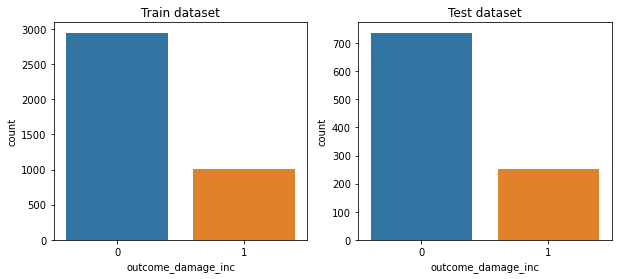

In [580]:
# Check for imbalance ratio in training and test set

fig, ax= plt.subplots(1,2, figsize=(10,4))

sns.countplot(x="outcome_damage_inc", data=pd.DataFrame(y_train_damage_inc), ax = ax[0]).set_title("Train dataset")

print("Imbalance ratio training dataset: ", round(y_train_damage_inc.value_counts()[1] / y_train_damage_inc.value_counts()[0]*100, 2), '%')

sns.countplot(x="outcome_damage_inc", data=pd.DataFrame(y_test_damage_inc), ax = ax[1]).set_title("Test dataset")

print("Imbalance ratio test dataset: ", round(y_test_damage_inc.value_counts()[1] / y_test_damage_inc.value_counts()[0]*100, 2), '%')



The imbalance ratio in the test and training dataset is around 34%, which is not extreme but can still have an influence on the algorithm that we will use to predict the damage indicator. As the number of observations is not really big, undersampling the majority class doesn't seem such a good idea (as this also throws away useful information). Instead, let's oversample the minority class using SMOTE. We will only apply SMOTE on the training dataset and not on the test dataset. We want to have an evaluation metric based on a realistic and therefore unbalanced test dataset. 


In [581]:
# create SMOTE object 

sm = SMOTE(random_state=8421, sampling_strategy= 'auto')


# Create new train data

X_train_smote, y_train_smote = sm.fit_sample(X = X_train_damage_inc,y = y_train_damage_inc)


# Check balance of classes 

np.bincount(y_train_smote)

array([2945, 2945], dtype=int64)

## **Part 7c: random forest classifier (using random grid search for hyperparameters)**

Now we have fixed the imbalanced classes using SMOTE, we can go further to the modelling part. We will use the random forest classifier algorithm to obtain a model to estimate the binary damage indicator. We will also use a 5-fold cross-validation to obtain values for the hyperparameters. 


In [583]:
# Import packages 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 30, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 4, 10]
bootstrap = [True, False]


# create the random grid to search for best hyperparameters

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Cross validation to obtain hyperparamaters

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 500, 
                               cv = 3, 
                               verbose=2, 
                               random_state=843,
                               n_jobs = -1)

rf_random.fit(X_train_smote, y_train_smote)

rf_random.best_params_




Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 48.1min finished


{'n_estimators': 911,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

When looking at the hyperparameters, it seems that there will probably be some overfitting (a lot of trees, no max depth of the trees, only 2 observations in each leaf,...). Let's have a look at the influence of the hyperparameters on the performance and see if we can change some hyperparameters to reduce the overfitting.

In [609]:
# Cross validation results
cv_results = pd.DataFrame(rf_random.cv_results_)

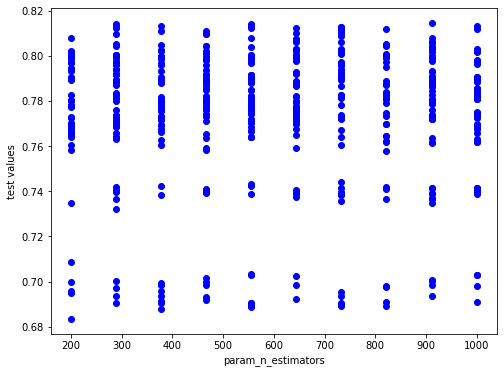

In [613]:
# param_min_samples_split
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cv_results['param_n_estimators'], cv_results['mean_test_score'], c='blue');
ax.set_xlabel("param_n_estimators");
ax.set_ylabel("test values");

There is not a lot of influence of the number of trees. So we may reduce the number to about 750 trees instead of 911. 

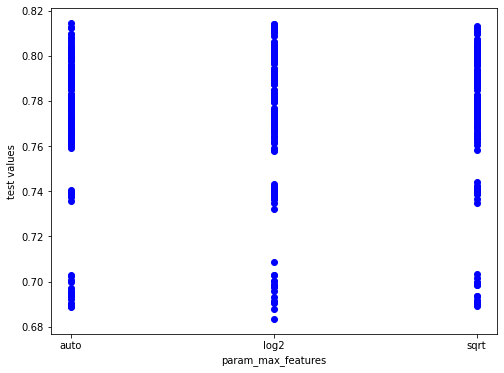

In [603]:
# param_min_samples_split
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cv_results['param_max_features'], cv_results['mean_test_score'], c='blue');
ax.set_xlabel("param_max_features");
ax.set_ylabel("test values");

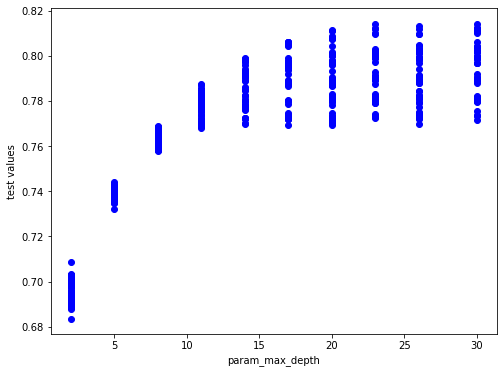

In [614]:
# param_min_samples_split
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cv_results['param_max_depth'], cv_results['mean_test_score'], c='blue');
ax.set_xlabel("param_max_depth");
ax.set_ylabel("test values");

Here it is clear that if the depth of the tree increases, the performance increases as well. But maybe having a max depth of 30 may be better than having no max depth at all. 

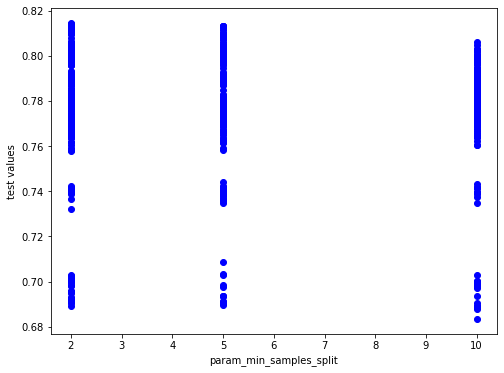

In [615]:
# param_min_samples_split
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cv_results['param_min_samples_split'], cv_results['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_split");
ax.set_ylabel("test values");

The higher the minimal number of samples per split, the lower the performance. However, the difference in performance between 2 and 5 samples seems small, so maybe we can change that hyperparameter as well. 

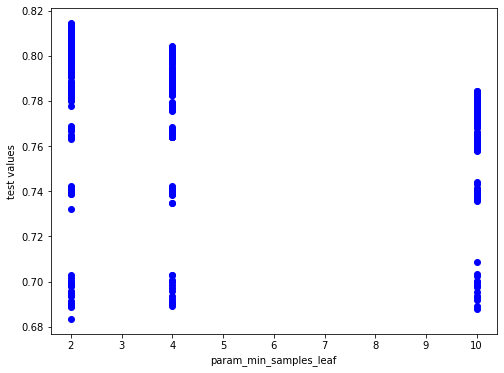

In [602]:
# param_min_samples_split
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_leaf");
ax.set_ylabel("test values");

Here, the best performance is obviously with minimum 2 samples per leaf. We will leave this like that. 

Next, build a model using the selected hyperparameters based on the balanced training dataset. 



In [618]:
# Build random forest classifier with the obtained hyperparameters

par = {'n_estimators': 750,
       'min_samples_split': 5,
       'min_samples_leaf': 2,
       'max_features': 'auto',
       'max_depth': 30,
       'bootstrap': False}

rfc_model = RandomForestClassifier(**par)
rfc_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=750)

## **Part 7d: predict damage outcome (binary and probility)**

Next, we are going to use the model to predict the damage outcomes for the train and test dataset:
- probability of damage
- 0/1 damage indicator (based on default cut-off of 0.5)

In [627]:
# Predictions for train dataset and test dataset

y_pred_train_bin = rfc_model.predict(X_train_damage_inc)
y_pred_train_prob = rfc_model.predict_proba(X_train_damage_inc)

y_pred_test_bin = rfc_model.predict(X_test_damage_inc)
y_pred_test_prob = rfc_model.predict_proba(X_test_damage_inc)



Lets have a look at the confusion matrices (based on cut-off of 0.5). 

Text(0.5, 1.0, 'Confusion matrix test data')

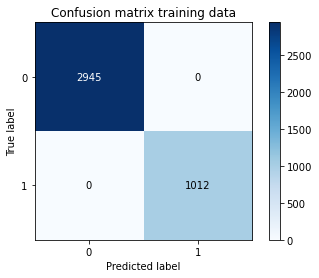

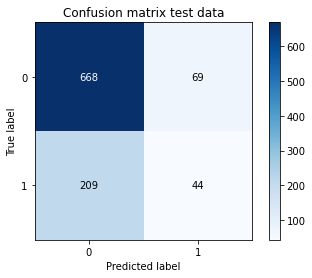

In [628]:
# confusion matrix (cut-off = 0.5)

confusion_matrix_train = confusion_matrix(y_train_damage_inc, y_pred_train_bin)
confusion_matrix_test = confusion_matrix(y_test_damage_inc, y_pred_test_bin)

skplt.metrics.plot_confusion_matrix(y_train_damage_inc, y_pred_train_bin).set_title("Confusion matrix training data")
skplt.metrics.plot_confusion_matrix(y_test_damage_inc, y_pred_test_bin).set_title("Confusion matrix test data")

Let's calculate the negative predictive value for these 2 confusion matrices.

In [629]:
# If we predict that a customer will not cause damage, how many will really not have caused any damage?

NPV_train = confusion_matrix_train[0,0] / confusion_matrix_train[:,0].sum() 
print("Negative predictive value train data: ", round(NPV_train, 3))

NPV_test =  confusion_matrix_test[0,0] / confusion_matrix_test[:,0].sum() 
print("Negative predictive value test data: ", round(NPV_test, 3))

Negative predictive value train data:  1.0
Negative predictive value test data:  0.762


We clearly have overfitting as all observations are classified correctly in the training dataset, this is the case if the cut-off is 0.5. Now let's vary this cut-off and see if we can improve this. 

## **Part 7d: choose cut-off in order to optimise negative predictive value**

Create a function to calculate the negative predictive value in function of the cut-off value.


In [630]:
# Create a function to calculate the negative predictive value (depending on cut-off)

# true_bin_outcome: 
# predicted_prob:
# cut_off

def calc_NPV(true_bin_outcome, predicted_prob, cut_off):
    
    true_values = pd.Series(true_bin_outcome).reset_index(drop = True)
    pred_values = pd.Series(predicted_prob[:, 1]).reset_index(drop = True) 

    group = [None] * len(true_values)
    
    for i in range(0, len(true_values)):
        
        if true_values[i] == 0 and pred_values[i] < cut_off:
            group[i] = "a"
        
        elif true_values[i] == 0 and pred_values[i] >= cut_off:
            group[i] = "b"
        
        elif true_values[i] == 1 and pred_values[i] < cut_off:
            group[i] = "c"

        else:
            group[i] = "d"
            
    count_groups = df_counts = pd.Categorical(group, categories=['a', 'b', 'c', 'd'], ordered=False).value_counts()
    NPV = count_groups['a'] / (count_groups['a'] + count_groups['c'])
    
    return NPV  
        
    


Lets check if the function works. If we apply the function on the test and train dataset with a cut_off value of 0.5, then we would need to see the same results as before. 

In [631]:
print(calc_NPV(true_bin_outcome = y_train_damage_inc, 
         predicted_prob = y_pred_train_prob,
         cut_off = 0.5))

print(calc_NPV(true_bin_outcome = y_test_damage_inc, 
         predicted_prob = y_pred_test_prob,
         cut_off = 0.5))

1.0
0.7616875712656784


The function works. Now lets calculate the negative predictive value for a series of cut-offs and plot this for the train and test dataset. 





In [632]:
index = range(0, 100)
columns=['cut_off', 'NPV_train', 'NPV_test']

final = pd.DataFrame(index = index, columns=columns)


for i in range(0,100):
    
    final.cut_off[i] = i / 100
    
    final.NPV_train[i] = calc_NPV(true_bin_outcome = y_train_damage_inc, 
                                  predicted_prob = y_pred_train_prob,
                                  cut_off = i / 100)
    
    final.NPV_test[i] = calc_NPV(true_bin_outcome = y_test_damage_inc, 
                                 predicted_prob = y_pred_test_prob,
                                 cut_off = i / 100)     
    
      

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in longlong_scalars


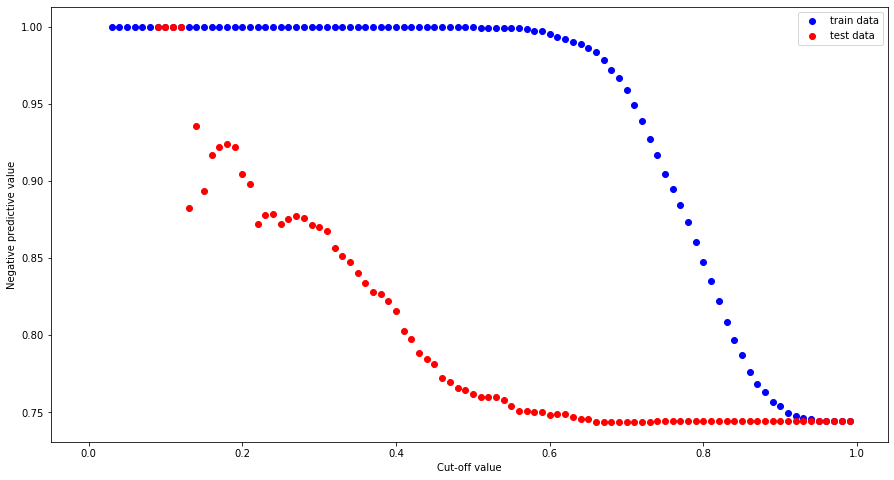

In [633]:
plt.figure(figsize=(15, 8))
plt.scatter(x = final.cut_off, y = final.NPV_train, c='b', label='train data')
plt.scatter(x = final.cut_off, y = final.NPV_test, c='r',label='test data')
plt.legend(loc='upper right')
plt.xlabel('Cut-off value')
plt.ylabel('Negative predictive value')
plt.show()

In [720]:
final.iloc[15:40,]

,cut_off,NPV_train,NPV_test
15,0.15,1,0.893617
16,0.16,1,0.916667
17,0.17,1,0.922078
18,0.18,1,0.923913
19,0.19,1,0.921739
20,0.2,1,0.904412
21,0.21,1,0.898089
22,0.22,1,0.87234
23,0.23,1,0.877828
24,0.24,1,0.878327


We see here again that there is overfitting (the NPV in the training dataset is close to 1 for all cut-off values between 0 and 0.6). We decide to use a cut-off value of 0.27, which delivered a NPV of 0.877 in the test dataset. This is really playing at the safe side. By putting the cut-off this low, there will probably be customers who are flagged as "caused damage" even if they did not. However, we assumed that the hotel really wants to avoid having bad customers and as this is an exclusive hotel, they will have enough customers to choose from probably so they can be quite strict. 

# **Part 8: Model damage outcome**

## **Part 8a: Split train/test set**

Split the dataset in a train and test set. We will build 2 models on the training set, and choose the best one based on the test set. The first model is trained on the whole dataset, while the second model will be trained only on those who actually incurred damage.

In [726]:
X_train_dam_amount, X_test_dam_amount, y_train_dam_amount, y_test_dam_amount = train_test_split(train_dataset_dum.drop(outcome_var,1),
                                                                                                train_dataset_dum.outcome_damage_amount, 
                                                                                                test_size=0.2, 
                                                                                                random_state=327)

## **Part 8b: model based on whole training dataset**

Create a random forest model using a random set of hyperparameters. 

In [727]:
rf_rand = RandomForestRegressor(n_estimators = 1000,
                                oob_score = True,
                                n_jobs = -1,
                                random_state =65484, 
                                max_depth=9, 
                                min_samples_split = 2, 
                                min_samples_leaf = 1, 
                                max_features="auto") 

rf_rand.fit(X_train_dam_amount, y_train_dam_amount)

print('R2: %.3f' % rf_rand.score(X_train_dam_amount, np.array(y_train_dam_amount).reshape(-1,1)))


R2: 0.461


Apply cross validation to obtain optimal hyperparameters (use random grid search). 

In [729]:
# Define grid 

n_estimators = [int(x) for x in np.linspace(start = 2, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 500, num = 100)]
max_depth.append(None)
min_samples_split = [1,2,5,10]
min_samples_leaf = [1,2,4,10]
bootstrap = [True, False]


# create the random grid to search for best hyperparameters

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# then create the base model to tune

rf = RandomForestRegressor()


# random search of parameters, using 3 fold cross validation, across 500 different hyperparameter combinations, and use all available cores

rf_grids_dam = RandomizedSearchCV(estimator = rf, 
                                  param_distributions = random_grid,
                                  n_iter = 500,
                                  cv = 3, 
                                  verbose=4, 
                                  random_state=42, 
                                  n_jobs = -1)

# Fit the random search model
rf_grids_dam.fit(X_train_dam_amount, y_train_dam_amount)
rf_grids_dam.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 67.5min finished


{'n_estimators': 596,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 22,
 'bootstrap': True}

Build a model with the resulting set of hyperparameters and check the evaluation metric.

In [730]:
params_dam = rf_grids_dam.best_params_
rf_grid_damage = RandomForestRegressor(**params_dam)
rf_grid_damage.fit(X_train_dam_amount, y_train_dam_amount)
print('R2: %.3f' % rf_grid_damage.score(X_train_dam_amount, y_train_dam_amount))

R2: 0.441


Let's check the influence of the hyperparameters on the performance. 

In [731]:
res_mod1_dam = pd.DataFrame(rf_grids_dam.cv_results_)

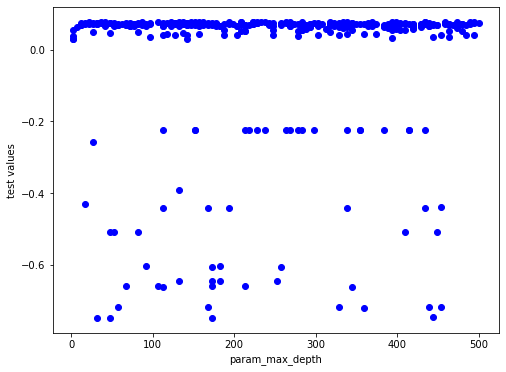

In [732]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam['param_max_depth'], res_mod1_dam['mean_test_score'], c='blue');
ax.set_xlabel("param_max_depth");
ax.set_ylabel("test values");

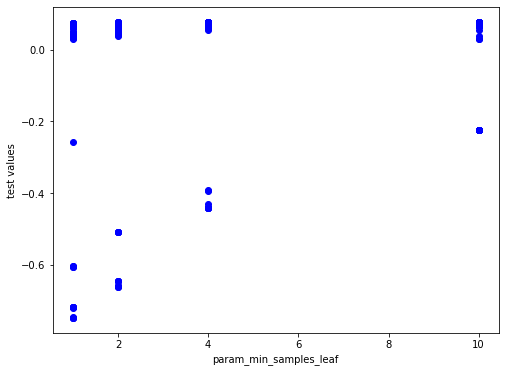

In [733]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam['param_min_samples_leaf'], res_mod1_dam['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_leaf");
ax.set_ylabel("test values");

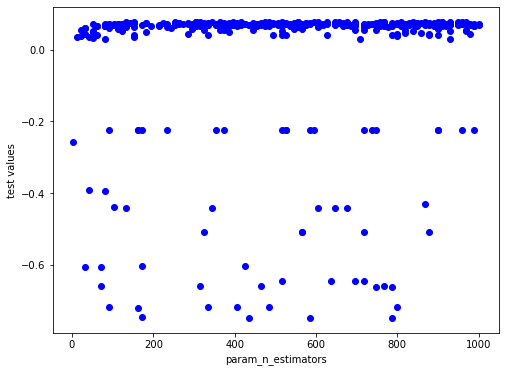

In [734]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam['param_n_estimators'], res_mod1_dam['mean_test_score'], c='blue');
ax.set_xlabel("param_n_estimators");
ax.set_ylabel("test values");

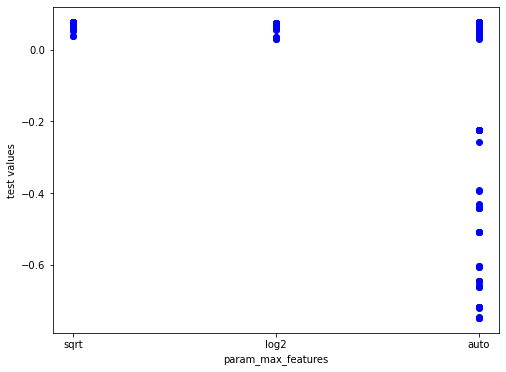

In [735]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam['param_max_features'], res_mod1_dam['mean_test_score'], c='blue');
ax.set_xlabel("param_max_features");
ax.set_ylabel("test values");

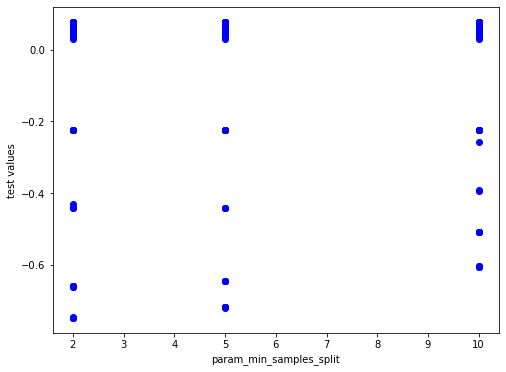

In [736]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam['param_min_samples_split'], res_mod1_dam['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_split");
ax.set_ylabel("test values");

Next, narrow down the grid and do a grid search with cross validation.

In [737]:
# Grid 

n_estimators = [int(x) for x in np.linspace(5, 1000, num = 5)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num = 2)]
max_depth.append(None)
min_samples_leaf = [1,2,10,14,18]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()

grid_search_dam = GridSearchCV(estimator = rf,
                               param_grid = param_grid, 
                               cv = 5, 
                               verbose=4, 
                               n_jobs = -1)

grid_search_dam.fit(X_train_dam_amount, y_train_dam_amount)
grid_search_dam.best_params_


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 613 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 15.6min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 502}

Check performance of the model built with the resulting set of hyperparameters. 

In [739]:
params_dam_2 = grid_search_dam.best_params_
rf_grid_dam_2 = RandomForestRegressor(**params_dam_2)
rf_grid_dam_2.fit(X_train_dam_amount, y_train_dam_amount)
print('Train R2: %.3f' % rf_grid_dam_2.score(X_train_dam_amount, y_train_dam_amount))
print('Test R2: %.3f' % rf_grid_dam_2.score(X_test_dam_amount, y_test_dam_amount))

Train R2: 0.377
Test R2: 0.100


The performance of this model is really not good, not in the train data and definately not in the test dataset. Let's hope the other model is better.

## **Part 8c: model based on customers causing damage in training dataset**

Make a subset that only contains the customers that have caused damage.

In [741]:
# Create subset 

train_dataset_only = train_dataset_dum[train_dataset_dum['outcome_damage_inc'] == 1]
train_dataset_only.head(n=10)
train_dataset_only.shape

(1265, 97)

Split this subset in a train and test dataset. 

In [743]:
X_train_dam_only_amount, X_test_dam_only_amount, y_train_dam_only_amount, y_test_dam_only_amount = train_test_split(train_dataset_only.drop(outcome_var,1),
                                                                                                                    train_dataset_only.outcome_damage_amount, 
                                                                                                                    test_size=0.2, 
                                                                                                                    random_state=327)

In [745]:
# Grid 

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 500, num = 50)]
max_depth.append(None)
min_samples_split = [1,2,5,10]
min_samples_leaf = [1,2,4,10]
bootstrap = [True, False]


# create the random grid to search for best hyperparameters

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# then create the base model to tune

rf = RandomForestRegressor()


# random search of parameters, using 3 fold cross validation, across 500 different hyperparameter combinations, and use all available cores

rf_grids_dam_only = RandomizedSearchCV(estimator = rf, 
                                       param_distributions = random_grid,
                                       n_iter = 500, 
                                       cv = 3, 
                                       verbose=2, 
                                       random_state=42, 
                                       n_jobs = -1)

# Fit the random search model
rf_grids_dam_only.fit(X_train_dam_only_amount,y_train_dam_only_amount)
rf_grids_dam_only.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 18.9min finished


{'n_estimators': 769,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 408,
 'bootstrap': True}

Build a model with the resulting set of hyperparameters and check the evaluation metric.

In [747]:
params_dam_only = rf_grids_dam_only.best_params_
rf_grid_damage_only = RandomForestRegressor(**params_dam_only)
rf_grid_damage_only.fit(X_train_dam_only_amount, y_train_dam_only_amount)
print('R2: %.3f' % rf_grid_damage_only.score(X_train_dam_only_amount, y_train_dam_only_amount))

R2: 0.665


Check influence of the hyperparameters on the performance. 


In [748]:
res_mod1_dam_only = pd.DataFrame(rf_grids_dam_only.cv_results_)

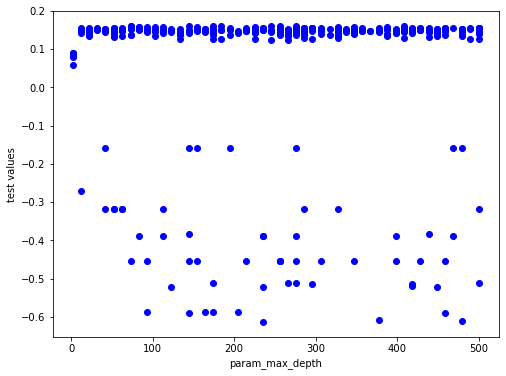

In [749]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam_only['param_max_depth'], res_mod1_dam_only['mean_test_score'], c='blue');
ax.set_xlabel("param_max_depth");
ax.set_ylabel("test values");

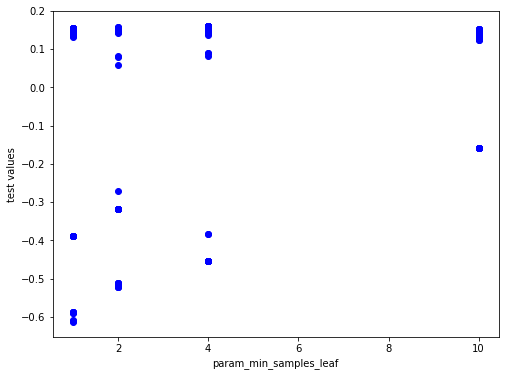

In [750]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam_only['param_min_samples_leaf'], res_mod1_dam_only['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_leaf");
ax.set_ylabel("test values");

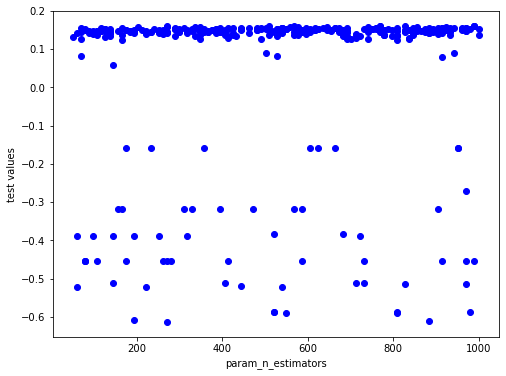

In [751]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam_only['param_n_estimators'], res_mod1_dam_only['mean_test_score'], c='blue');
ax.set_xlabel("param_n_estimators");
ax.set_ylabel("test values");

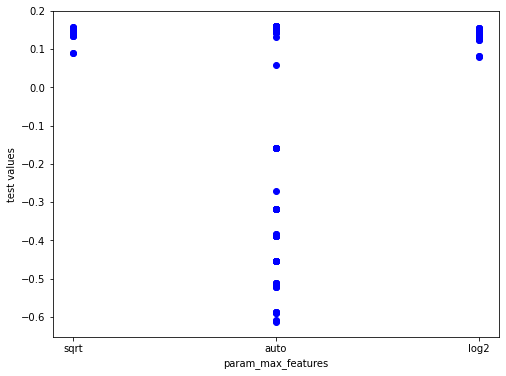

In [752]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam_only['param_max_features'], res_mod1_dam_only['mean_test_score'], c='blue');
ax.set_xlabel("param_max_features");
ax.set_ylabel("test values");

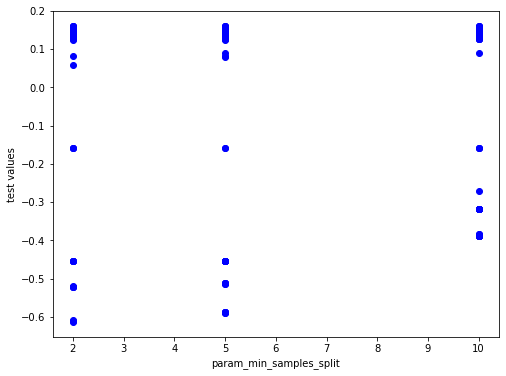

In [753]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(res_mod1_dam_only['param_min_samples_split'], res_mod1_dam_only['mean_test_score'], c='blue');
ax.set_xlabel("param_min_samples_split");
ax.set_ylabel("test values");

Narrow the grid down and do grid search again. 

In [754]:
# Grid 

n_estimators = [int(x) for x in np.linspace(5, 1000, num = 5)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num = 2)]
max_depth.append(None)
min_samples_leaf = [1,2,10,14,18]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()

grid_search_dam_only = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1)
grid_search_dam_only.fit(X_train_dam_only_amount, y_train_dam_only_amount)
grid_search_dam_only.best_params_


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.0min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 502}

Check how the model performs.

In [755]:
params_dam_only2 = grid_search_dam_only.best_params_
rf_grid_damage_only2 = RandomForestRegressor(**params_dam_only2)
rf_grid_damage_only2.fit(X_train_dam_only_amount, y_train_dam_only_amount)
print('R2: %.3f' % rf_grid_damage_only2.score(X_train_dam_only_amount, y_train_dam_only_amount))
print('R2: %.3f' % rf_grid_damage_only2.score(X_test_dam_only_amount, y_test_dam_only_amount))

R2: 0.693
R2: 0.147


This model is a litle bit better than the previous model, but is still not good. Possible reasons for this may be that:
- the damage amount range is quite wide
- there may be extreme outliers
- we modelled the damage outcome and not the damage outcome per night (the longer you stay, the greater the chance that the damage amount is bigger)
- the damage amount is influenced by something where we don't have any information about

For now, we leave it like this. 

# **Part 9: Use models on score dataset**

## **Part 9a: Data preperation of score dataset**

First we will apply the same transformations and changes on the score dataset as we did on the training dataset. 
- change scoring variables
- remove tenure_yrs 
- apply one-hot-encoding 
- standardising of continuous variables
- impute missing values


In [756]:
# Negative scores 

id_neg_scores_sc = [None] * len(score_dataset.columns)


for i in range(0, len(score_dataset.columns)):
    id_neg_scores_sc[i] = score_dataset.columns[i] in neg_scores
    

negative_scores_sc = score_dataset.loc[:, id_neg_scores_sc]


score5_neg_score = negative_scores_sc['score5_neg']


missing_values_sc = score5_neg_score.isnull()


score5_neg_quant_sc = [None]*len(score5_neg_score)


for i in range(0, len(score5_neg_score)):
    
    if missing_values_sc[i] == True:
        score5_neg_quant_sc[i] = float("NaN")
        
    else:
         score5_neg_quant_sc[i] =stats.percentileofscore(all_neg5_scores_no_NA, score5_neg_score[i])/100


negative_scores_sc_2 = pd.concat([negative_scores_sc.iloc[:, 0:4], 
                               pd.DataFrame(score5_neg_quant_sc, columns= ['score5_neg'])],
                              axis=1)

average_neg_score_sc = negative_scores_sc_2.mean(axis = 1, skipna = True)
n_neg_score_sc = negative_scores_sc_2.notnull().sum(axis=1)

print("Number of missing values:", average_neg_score_sc.isnull().sum())
print("Percentage of missing values:", average_neg_score_sc.isnull().sum()/len(average_neg_score_sc)*100)



Number of missing values: 112
Percentage of missing values: 22.400000000000002


In [757]:
# Positive scores

id_pos_scores_sc = [None] * len(score_dataset.columns)

for i in range(0, len(score_dataset.columns)):
    id_pos_scores_sc[i] = score_dataset.columns[i] in pos_scores

positive_scores_sc = score_dataset.loc[:, id_pos_scores_sc]
    
average_pos_score_sc = positive_scores_sc.mean(axis = 1, skipna = True)
n_pos_score_sc = positive_scores_sc.notnull().sum(axis=1)

print("Number of missing values:", average_pos_score_sc.isnull().sum())
print("Percentage of missing values:", average_pos_score_sc.isnull().sum()/len(average_pos_score_sc)*100)

Number of missing values: 152
Percentage of missing values: 30.4


In [758]:
# Add new variables and remove original score variables 

score_dataset['average_neg_score'] = average_neg_score_sc
score_dataset['n_neg_score'] = n_neg_score_sc
score_dataset['average_pos_score'] = average_pos_score_sc
score_dataset['n_pos_score'] = n_pos_score_sc

score_dataset_new = score_dataset.drop(score_dataset.loc[:, 'score1_pos':'score5_neg'].columns, axis = 1)



In [759]:
# Drop correlated variable

score_dataset_new = score_dataset_new.drop(['tenure_yrs'],axis = 1)


In [760]:
# One-hot-encoding

# First, we'll take a look at the once that are already binary, but need to be recoded to a 0/1 coding scheme

score_dataset_new['married_cd'] = score_dataset_new['married_cd'].astype('str')
score_dataset_new['gender'] = score_dataset_new['gender'].astype('str')
score_dataset_new['fam_adult_size'] = score_dataset_new['fam_adult_size'].astype('str')
score_dataset_new['married_cd'] = score_dataset_new['married_cd'].replace({'False':0,'True':1})
score_dataset_new['gender'] = score_dataset_new['gender'].replace({'M':0,'V':1})
score_dataset_new['fam_adult_size'] = score_dataset_new['fam_adult_size'].replace({'0':0,'1':1, 
                                                                             '2':2, '3': 3, '4':3})


# Make variables categorical and make sure that the levels of the variables are the same in the train and test dataset

score_dataset_new['client_segment'] = pd.Categorical(score_dataset_new['client_segment'],
                                                     categories=train_dataset_lim2.client_segment.unique())

score_dataset_new['sect_empl'] = pd.Categorical(score_dataset_new['sect_empl'],
                                                categories=train_dataset_lim2.sect_empl.unique())

score_dataset_new['damage_inc'] = pd.Categorical(score_dataset_new['damage_inc'], 
                                                 categories=train_dataset_lim2.damage_inc.unique())

score_dataset_new['claims_no'] = pd.Categorical(score_dataset_new['claims_no'], 
                                                categories=train_dataset_lim2.claims_no.unique())

score_dataset_new['fam_adult_size'] = pd.Categorical(score_dataset_new['fam_adult_size'],
                                                     categories=train_dataset_lim2.fam_adult_size.unique())

score_dataset_new['children_no'] = pd.Categorical(score_dataset_new['children_no'], 
                                                  categories=train_dataset_lim2.children_no.unique())
                                               

score_dataset_new['n_pos_score'] = pd.Categorical(score_dataset_new['n_pos_score'],
                                                  categories=train_dataset_lim2.n_pos_score.unique())
                                              

score_dataset_new['n_neg_score'] = pd.Categorical(score_dataset_new['n_neg_score'],
                                                  categories=train_dataset_lim2.n_neg_score.unique())
                                                 

    
# One-hot encoding

score_dataset_dummies = pd.get_dummies(score_dataset_new[['client_segment',
                                                          'sect_empl', 
                                                          'damage_inc',
                                                          'claims_no',
                                                          'fam_adult_size', 
                                                          'children_no',
                                                          'n_pos_score', 
                                                          'n_neg_score']])
score_dataset_dummies.head()



# Add dummy variables

score_dataset_dum = pd.concat([score_dataset_new, score_dataset_dummies], axis = 1)
score_dataset_dum


# Remove original variables

score_dataset_dum.drop(['client_segment',
                        'sect_empl', 
                        'damage_inc',
                        'claims_no', 
                        'fam_adult_size', 
                        'children_no', 
                        'n_pos_score', 
                        'n_neg_score'],
                       axis = 1,
                       inplace = True)




# check the number of variables

print(score_dataset_dum.shape)
print(train_dataset_dum.shape)


# Check which variables are missing in the score dataset

train_dataset_dum.columns[pd.Series(train_dataset_dum.columns.isin(score_dataset_dum.columns) == False)]



(500, 91)
(4947, 97)


Index(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount',
       'outcome_profit_per_night', 'outcome_damage_per_night', 'isol'],
      dtype='object')

In [761]:
# Standardising of continuous variables 

score_dataset_dum[cont_var] = scaler.fit_transform(score_dataset_dum[cont_var])



In [762]:
# Impute missing values

for cols in ['average_pos_score',
             'average_neg_score',
             'tenure_mts', 
             'neighbor_income',
             'presidential',
             'cab_requests', 
             'shop_use', 
             'dining_ic']: 
    
    score_dataset_dum[cols] = imputer.fit_transform(score_dataset_dum[[cols]])
    
    
    

Imputing row 1/500 with 0 missing, elapsed time: 0.056
Imputing row 101/500 with 1 missing, elapsed time: 0.063
Imputing row 201/500 with 0 missing, elapsed time: 0.065
Imputing row 301/500 with 1 missing, elapsed time: 0.073
Imputing row 401/500 with 0 missing, elapsed time: 0.073
[KNN] Warning: 152/500 still missing after imputation, replacing with 0
Imputing row 1/500 with 0 missing, elapsed time: 0.056
Imputing row 101/500 with 1 missing, elapsed time: 0.064
Imputing row 201/500 with 0 missing, elapsed time: 0.072
Imputing row 301/500 with 1 missing, elapsed time: 0.072
Imputing row 401/500 with 0 missing, elapsed time: 0.080
[KNN] Warning: 112/500 still missing after imputation, replacing with 0
Imputing row 1/500 with 0 missing, elapsed time: 0.064
Imputing row 101/500 with 0 missing, elapsed time: 0.064
Imputing row 201/500 with 0 missing, elapsed time: 0.064
Imputing row 301/500 with 0 missing, elapsed time: 0.064
Imputing row 401/500 with 0 missing, elapsed time: 0.072
[KNN] W

In [763]:
total = score_dataset_dum.isnull().sum().sort_values(ascending=False)
percent = round((score_dataset_dum.isnull().sum()/score_dataset_dum.isnull().count()).sort_values(ascending=False)*100, 1)
na_per_var = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
na_per_var.head(53)

,Total,Percent
income_am,4,0.8
bar_no,4,0.8
gold_status,4,0.8
retired,4,0.8
shop_am,4,0.8
nights_booked,4,0.8
company_ic,4,0.8
divorce,4,0.8
prev_all_in_stay,4,0.8
urban_ic,4,0.8


Even after using knn imputation, we still have missing values. Lets have a closer look.

In [764]:
# count number of missing values per customer 

nan_rowcount = score_dataset_dum.isnull().sum(axis=1)
print(nan_rowcount[nan_rowcount > 0])



311    22
320    23
409    22
421    23
dtype: int64


Apparently there are still 4 customers where we have 22 or 23 missing variables. In the end we only need to select 200 out of the 500 customers. Therefore, we will exclude these 4 customers because we don't have enough info about them and our models will also not give good results anyway in that case.


In [765]:
# Remove customers

id_cust = list(nan_rowcount[nan_rowcount == 0].index)
score_final =  score_dataset_dum.iloc[id_cust,:]

# Check results 

total = score_final.isnull().sum().sort_values(ascending=False)
percent = round((score_final.isnull().sum()/score_final.isnull().count()).sort_values(ascending=False)*100, 1)
na_per_var = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
na_per_var.head(53)

,Total,Percent
n_neg_score_5,0,0.0
prev_all_in_stay,0,0.0
tenure_mts,0,0.0
company_ic,0,0.0
claims_am,0,0.0
nights_booked,0,0.0
gender,0,0.0
shop_am,0,0.0
shop_use,0,0.0
retired,0,0.0


## **Part 9b: Predict outcomes**

Now all our models are build and our score dataset is prepared, we can use the models to predict:
- the profit amount
- the probability that a customer will cause damage
- binary indicator for a customer causing damage or not
- the damage amount

In [832]:
# predict profit amount 

pred_profit_amount = rf_grid.predict(score_final)


# predict the probability that a customer will cause damage

pred_damage_prob = rfc_model.predict_proba(score_final)[:,1]


# predict 0/1 indicator for a customer causing damage or not (using the predetermined cut-off value of 0.27)

pred_damage_bin = [None] * len(pred_damage_prob)


for i in range(0, len(pred_damage_prob)):
    
    if pred_damage_prob[i] > 0.27:
        pred_damage_bin[i] = 1

    else:
        pred_damage_bin[i] = 0
        

# Predict the damage amount

pred_damage_amount = rf_grid_damage_only2.predict(score_final)


# Combine all results in a dataframe

data = {'pred_profit_amount': pd.Series(pred_profit_amount), 
        'pred_damage_prob': pd.Series(pred_damage_prob), 
        'pred_damage_bin': pd.Series(pred_damage_bin), 
        'pred_damage_amount': pd.Series(pred_damage_amount)
       } 

final_result = pd.DataFrame(data) 
final_result.head()

,pred_profit_amount,pred_damage_prob,pred_damage_bin,pred_damage_amount
0,1452.454073,0.456036,1,934.276840
1,2278.339891,0.363846,1,799.555621
2,1712.620182,0.479120,1,1072.554442
3,2093.510073,0.423522,1,740.048393
4,1475.566036,0.212873,0,674.579341


Finally, we want to obtain a list of 200 customers that are attractive for the hotel, so customers with a good balance between their profit and the possible damage they will cost. Therefore we decided to use following metric:

- predicted profit amount - (predicted probability on damage * median of damage amount)

As the model for predicting the damage amount was so bad, we prefer not to use this. Instead we decided to use the median damage amount (of the customers that caused damage in the train dataset). 

This way of selecting clients does not take the variability of the profits into account. For example, if a lot of people were selected which a high probability of inflicting damage, this would lead to higher variability in month to month earnings for the hotel, since sometimes they would inflict damage, whilst other times they wouldn’t. On the other hand, if a lot of customers were selected with low probabilities of inflicting damages, this would result in more stable earnings since most of the times, there would not be any damages from those clients. It can be hypothesized that a hotel, especially if you take in the assumption that they have tourists all year round and not season wise (the Bahamas should have year round sun and white, sandy beaches right?), would prefer to have a more stable income. Additionally, one could argue that an exclusive hotel, would want to have the least damage to uphold its reputation. So a more in depth selection should be assessed.

A popular approach to make a trade off to stabilize these earnings, is the Kelly criterion. This is a formula often used in gambling and economy to stabilize and maximize the long term earnings of the respective practices. In the example of betting, this is a way to choose which amount of your money you should wage on a certain bet. This could be perhaps extrapolated to choose the right clients. For example, you could divide the customers into two categories: low damages and high damages. Thereafter you calculate which percentage of the low damages and the high damages you should select, and then select the highest predicted profits in each category. This is one way to stabilize the hotel’s earnings.


In [835]:
# Median damage amount 

median = train_dataset_only.outcome_damage_amount.median()


# Define metric 

final_result['metric'] = df.pred_profit_amount -  (df.pred_damage_prob * median)
final_result.head(5)

,pred_profit_amount,pred_damage_prob,pred_damage_bin,pred_damage_amount,metric
0,1452.454073,0.456036,1,934.276840,1145.714837
1,2278.339891,0.363846,1,799.555621,2033.609996
2,1712.620182,0.479120,1,1072.554442,1390.354544
3,2093.510073,0.423522,1,740.048393,1808.640882
4,1475.566036,0.212873,0,674.579341,1332.383211


Finally, order the list of customers according to decreasing size of the defined metric, select the first 200 customers and export this list to a csv file. 

In [836]:
sorted_data = final_result.sort_values(by = 'metric', ascending=False)
list_200 = sorted_data.iloc[0:200, ]
df.to_csv ('C:/Users/Emma/Documents/Machine learning with Python/Exam/Solution/list_200.csv', index = True, header=True)

# **Part 10: Other things we could have done**

There were a couple of things we could not do properly due to time constraints. 
We would have liked to:

-	do more elaborate feature engineering  
-	evaluate different imputation algorithms such as MICE
-	create different outcome variables (e.g. profit per night)
-	evaluate different models (e.g. linear models with regularization), especially on the third model (damage amount model)
-	evaluate the selection procedure of the hotel guests. Customers with a high probability of damage may cause a certain variability in month to month profits and it should be researched whether there are ways to maximize these profits in the long run.
- do some whiteboxing